In [1]:
# Set up
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib as mpl
import patsy as pt
    
import wooldridge as woo

In [2]:
org_data = woo.data('wage2')
org_data.head()

wage  hours   IQ  KWW  educ  exper  tenure  age  married  black  south  \
0   769     40   93   35    12     11       2   31        1      0      0   
1   808     50  119   41    18     11      16   37        1      0      0   
2   825     40  108   46    14     11       9   33        1      0      0   
3   650     40   96   32    12     13       7   32        1      0      0   
4   562     40   74   27    11     14       5   34        1      0      0   

   urban  sibs  brthord  meduc  feduc     lwage  
0      1     1      2.0    8.0    8.0  6.645091  
1      1     1      NaN   14.0   14.0  6.694562  
2      1     1      2.0   14.0   14.0  6.715384  
3      1     4      3.0   12.0   12.0  6.476973  
4      1    10      6.0    6.0   11.0  6.331502

In [3]:
org_data = woo.data('wage2')
org_data.head()

wage  hours   IQ  KWW  educ  exper  tenure  age  married  black  south  \
0   769     40   93   35    12     11       2   31        1      0      0   
1   808     50  119   41    18     11      16   37        1      0      0   
2   825     40  108   46    14     11       9   33        1      0      0   
3   650     40   96   32    12     13       7   32        1      0      0   
4   562     40   74   27    11     14       5   34        1      0      0   

   urban  sibs  brthord  meduc  feduc     lwage  
0      1     1      2.0    8.0    8.0  6.645091  
1      1     1      NaN   14.0   14.0  6.694562  
2      1     1      2.0   14.0   14.0  6.715384  
3      1     4      3.0   12.0   12.0  6.476973  
4      1    10      6.0    6.0   11.0  6.331502

In [4]:
org_data.isnull().sum()

wage         0
hours        0
IQ           0
KWW          0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
south        0
urban        0
sibs         0
brthord     83
meduc       78
feduc      194
lwage        0
dtype: int64

In [5]:
org_data = woo.data('wage2')
org_data.head()

wage  hours   IQ  KWW  educ  exper  tenure  age  married  black  south  \
0   769     40   93   35    12     11       2   31        1      0      0   
1   808     50  119   41    18     11      16   37        1      0      0   
2   825     40  108   46    14     11       9   33        1      0      0   
3   650     40   96   32    12     13       7   32        1      0      0   
4   562     40   74   27    11     14       5   34        1      0      0   

   urban  sibs  brthord  meduc  feduc     lwage  
0      1     1      2.0    8.0    8.0  6.645091  
1      1     1      NaN   14.0   14.0  6.694562  
2      1     1      2.0   14.0   14.0  6.715384  
3      1     4      3.0   12.0   12.0  6.476973  
4      1    10      6.0    6.0   11.0  6.331502

In [6]:
# Replace Null Value With Mean
m_b = org_data['brthord'].mean()
org_data['brthord'].fillna(value=m_b,inplace=True)

m_me = org_data['meduc'].mean()
org_data['meduc'].fillna(value=m_me,inplace=True)

m_f = org_data['feduc'].mean()
org_data['feduc'].fillna(value=m_f,inplace=True)

In [7]:
org_data.isnull().any()

wage       False
hours      False
IQ         False
KWW        False
educ       False
exper      False
tenure     False
age        False
married    False
black      False
south      False
urban      False
sibs       False
brthord    False
meduc      False
feduc      False
lwage      False
dtype: bool

# Variable Selection

## Boruta Algorithm

In [8]:
boruta_data = org_data[["lwage", "hours", "IQ", "KWW", "educ", "exper", "tenure", "age", 
                        "brthord", "meduc", "feduc", "sibs"]].copy()

  0%|          | 0/10 [00:00<?, ?it/s]

5 attributes confirmed important: ['KWW', 'educ', 'tenure', 'IQ', 'hours']
2 attributes confirmed unimportant: ['sibs', 'feduc']
4 tentative attributes remains: ['meduc', 'exper', 'age', 'brthord']


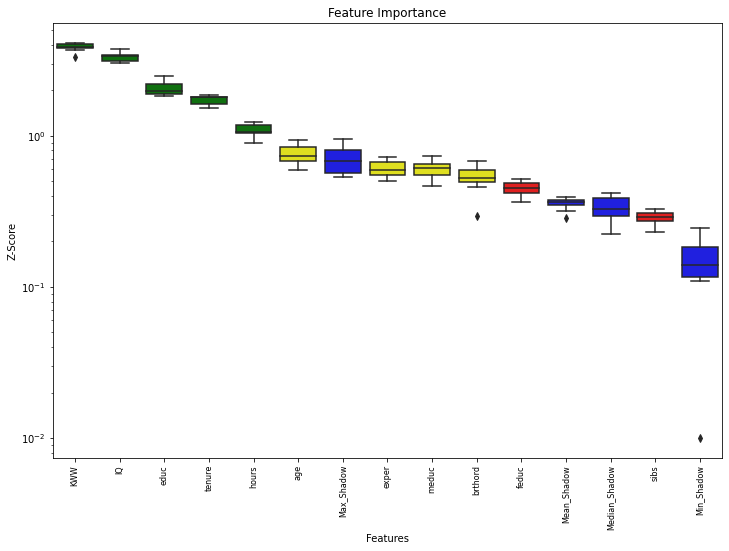

In [9]:
from BorutaShap import BorutaShap
x = boruta_data.iloc[:, 1:]
y = boruta_data['lwage']

Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=10, random_state=0)
Feature_Selector.plot(which_features='all')

**Interpretation:** According to boruta algorithm, the predictors we would like to use are KWW, IQ, educ, tenure, hours, age, married, black, south, urban.

# Descriptive Analysis

**In this data, the variables means as follows:**\
**wage**: monthly earnings\
**hours**: average weekly hours\
**IQ**: IQ score\
**KWW**: knowledge of world work score\
**educ**: years of education\
**exper**: years of work experience\
**tenure**: years with current employer\
**age**: age in years\
**married**: =1 if married\
**black**: =1 if black\
**south**: =1 if live in south\
**urban**: =1 if live in SMSA\
**sibs**: number of siblings\
**brthord**: birth order\
**meduc**: mother's education\
**feduc**: father's education\
**lwage**: natural log of wage

**Motivation:** According to the project description, we need to get a regression model with only one regressor, so we choose the wage 2 dataset in Woodbridge. We intend to set lwage as the dependent variable, and then we want to find the best description from the remaining 15 variables, i.e., which variable is the main influence on the change in income.

**Data Source:** M. Blackburn and D. Neumark (1992), “Unobserved Ability, Efficiency Wages, and Interindustry Wage Differentials,” Quarterly Journal of Economics 107, 1421-1436.

## Histograms and Density

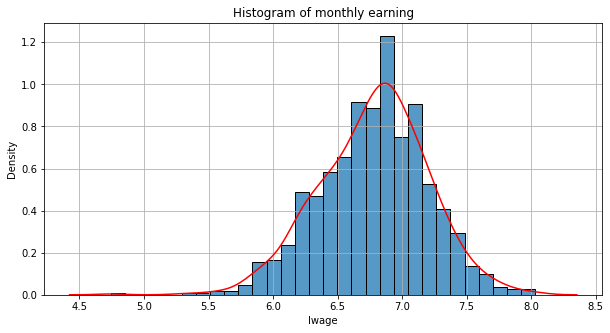

In [10]:
# Plotting lwage histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of monthly earning")
sns.histplot(org_data.lwage, stat = "density")
sns.kdeplot(org_data.lwage, color = "red")
plt.grid(True)

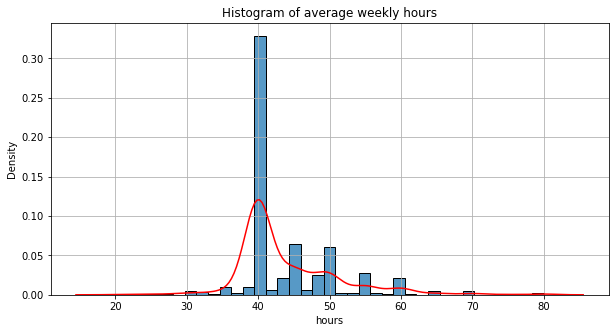

In [11]:
# Plotting hours histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of average weekly hours")
sns.histplot(org_data.hours, stat = "density")
sns.kdeplot(org_data.hours, color = "red")
plt.grid(True)

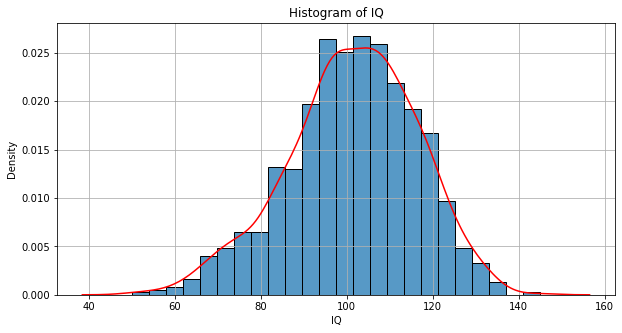

In [12]:
# Plotting IQ histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of IQ")
sns.histplot(org_data.IQ, stat = "density")
sns.kdeplot(org_data.IQ, color = "red")
plt.grid(True)

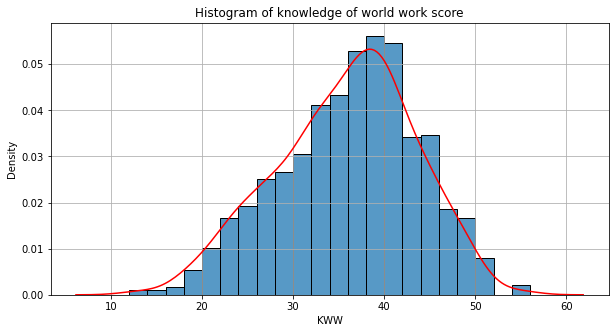

In [13]:
# Plotting KWW histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of knowledge of world work score")
sns.histplot(org_data.KWW, stat = "density")
sns.kdeplot(org_data.KWW, color = "red")
plt.grid(True)

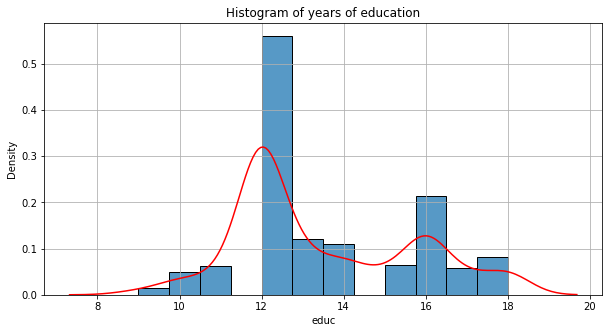

In [14]:
# Plotting educ histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of years of education")
sns.histplot(org_data.educ, stat = "density")
sns.kdeplot(org_data.educ, color = "red")
plt.grid(True)

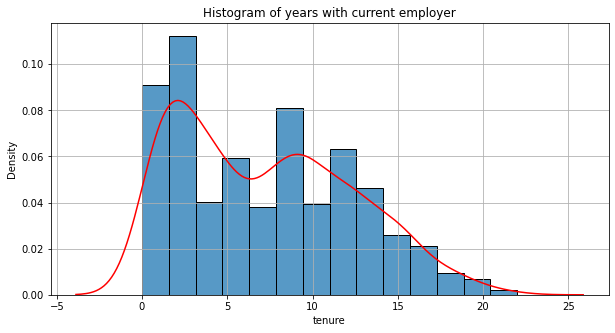

In [15]:
# Plotting tenure histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of years with current employer")
sns.histplot(org_data.tenure, stat = "density")
sns.kdeplot(org_data.tenure, color = "red")
plt.grid(True)

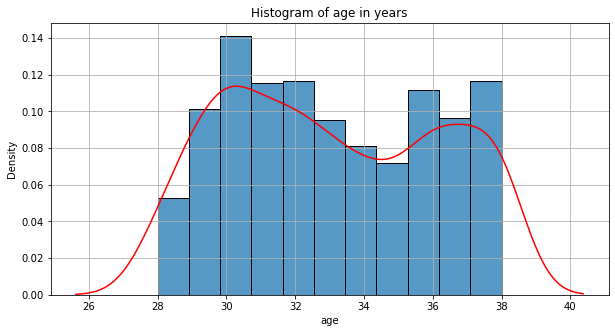

In [16]:
# Plotting age histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of age in years")
sns.histplot(org_data.age, stat = "density")
sns.kdeplot(org_data.age, color = "red")
plt.grid(True)

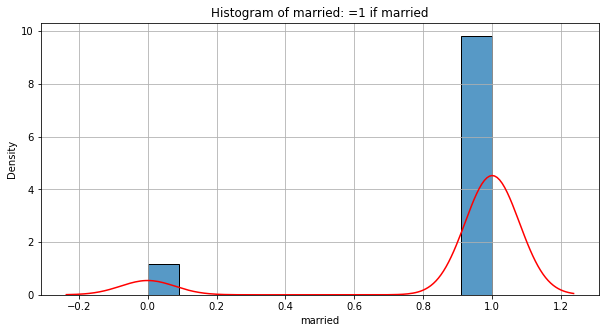

In [17]:
# Plotting married histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of married: =1 if married")
sns.histplot(org_data.married, stat = "density")
sns.kdeplot(org_data.married, color = "red")
plt.grid(True)

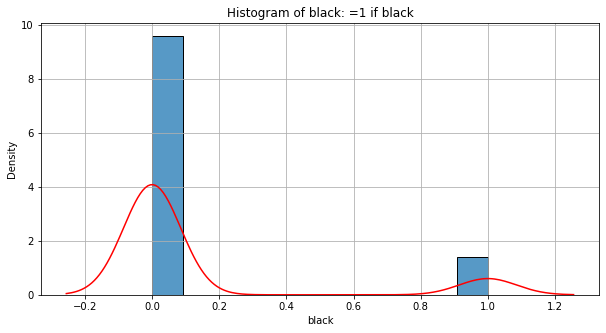

In [18]:
# Plotting black histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of black: =1 if black")
sns.histplot(org_data.black, stat = "density")
sns.kdeplot(org_data.black, color = "red")
plt.grid(True)

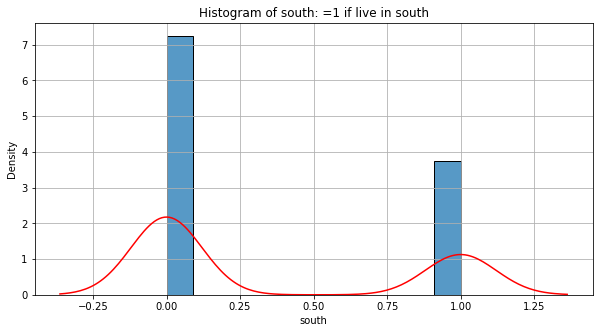

In [19]:
# Plotting south histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of south: =1 if live in south")
sns.histplot(org_data.south, stat = "density")
sns.kdeplot(org_data.south, color = "red")
plt.grid(True)

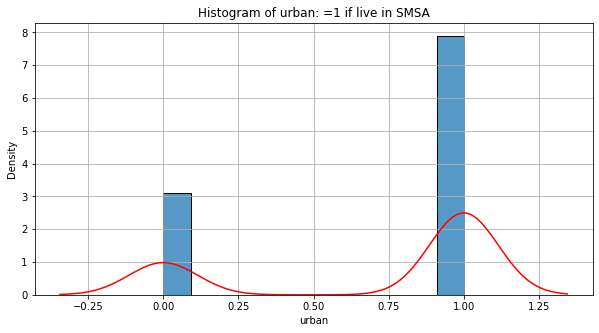

In [20]:
# Plotting urban histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of urban: =1 if live in SMSA")
sns.histplot(org_data.urban, stat = "density")
sns.kdeplot(org_data.urban, color = "red")
plt.grid(True)

## Quantile Plots

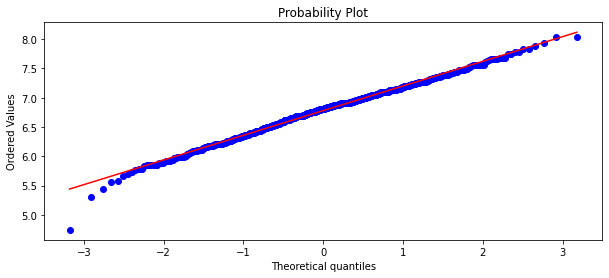

In [21]:
# Plotting lwage quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.lwage, dist="norm", plot=plt)
plt.show()

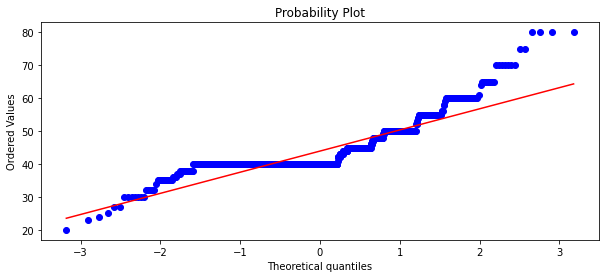

In [22]:
# Plotting hours quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.hours, dist="norm", plot=plt)
plt.show()

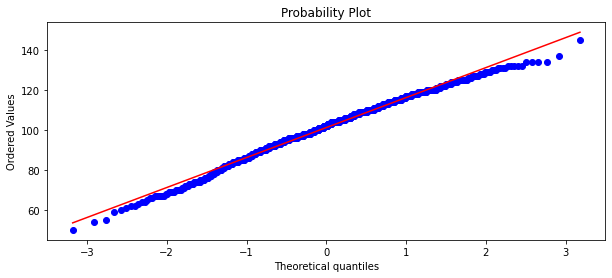

In [23]:
# Plotting IQ quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.IQ, dist="norm", plot=plt)
plt.show()

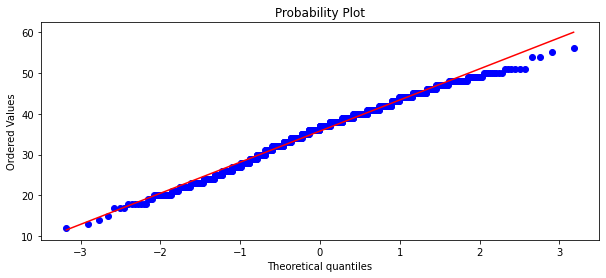

In [24]:
# Plotting KWW quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.KWW, dist="norm", plot=plt)
plt.show()

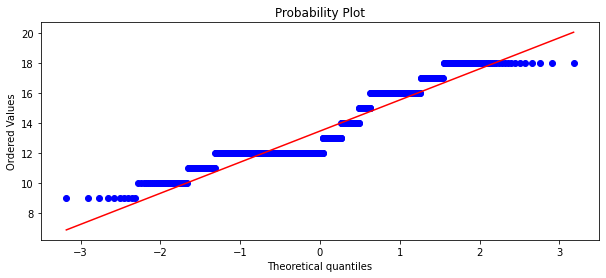

In [25]:
# Plotting educ quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.educ, dist="norm", plot=plt)
plt.show()

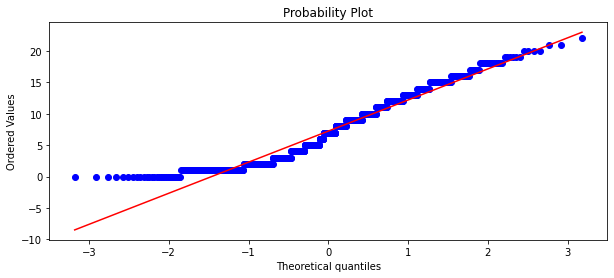

In [26]:
# Plotting tenure quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.tenure, dist="norm", plot=plt)
plt.show()

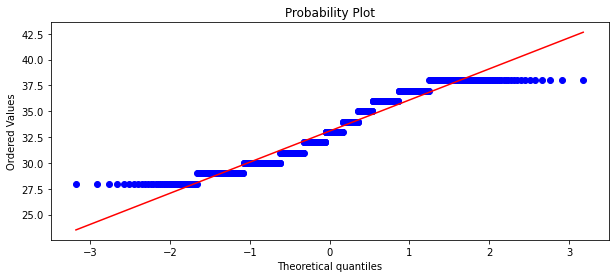

In [27]:
# Plotting age quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.age, dist="norm", plot=plt)
plt.show()

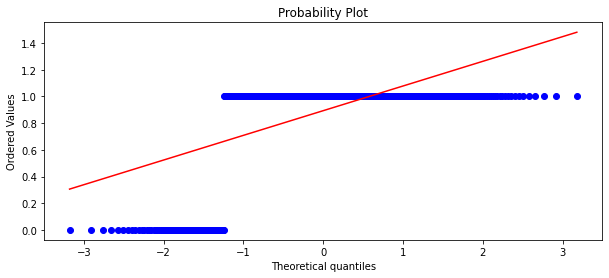

In [28]:
# Plotting married quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.married, dist="norm", plot=plt)
plt.show()

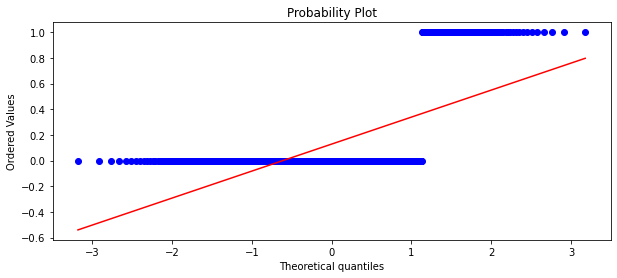

In [29]:
# Plotting black quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.black, dist="norm", plot=plt)
plt.show()

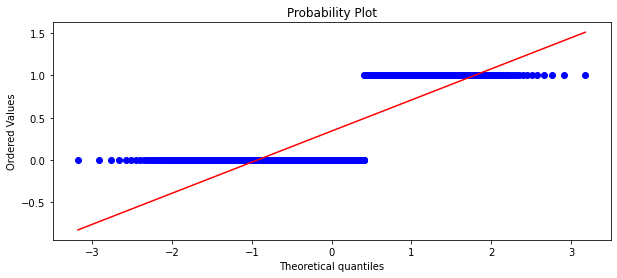

In [30]:
# Plotting south quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.south, dist="norm", plot=plt)
plt.show()

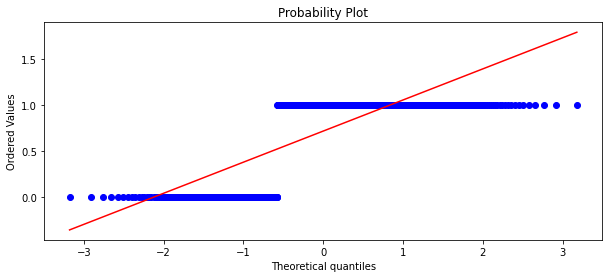

In [31]:
# Plotting urban quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.urban, dist="norm", plot=plt)
plt.show()

## Boxplot

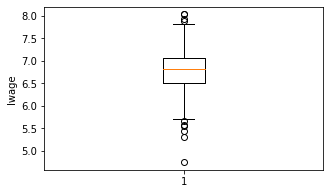

In [32]:
#Plotting Boxplot For lwage
plt.figure(figsize=(5,3))
plt.boxplot(org_data.lwage)
plt.ylabel("lwage")
plt.show()

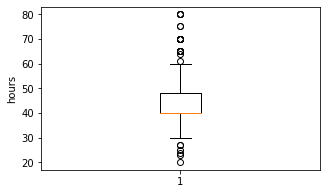

In [33]:
#Plotting Boxplot For hours
plt.figure(figsize=(5,3))
plt.boxplot(org_data.hours)
plt.ylabel("hours")
plt.show()

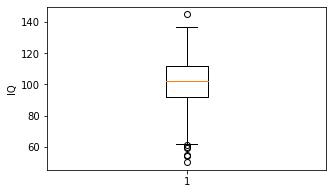

In [34]:
#Plotting Boxplot For IQ
plt.figure(figsize=(5,3))
plt.boxplot(org_data.IQ)
plt.ylabel("IQ")
plt.show()

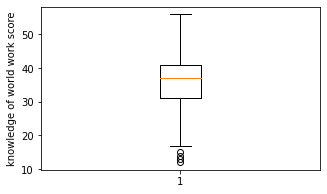

In [35]:
#Plotting Boxplot For KWW
plt.figure(figsize=(5,3))
plt.boxplot(org_data.KWW)
plt.ylabel("knowledge of world work score")
plt.show()

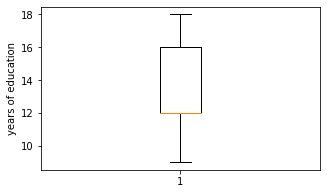

In [36]:
#Plotting Boxplot For educ
plt.figure(figsize=(5,3))
plt.boxplot(org_data.educ)
plt.ylabel("years of education")
plt.show()

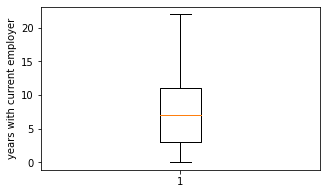

In [37]:
#Plotting Boxplot For tenure
plt.figure(figsize=(5,3))
plt.boxplot(org_data.tenure)
plt.ylabel("years with current employer")
plt.show()

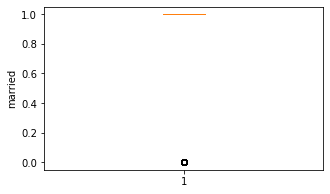

In [38]:
#Plotting Boxplot For married
plt.figure(figsize=(5,3))
plt.boxplot(org_data.married)
plt.ylabel("married")
plt.show()

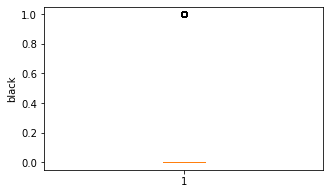

In [39]:
#Plotting Boxplot For black
plt.figure(figsize=(5,3))
plt.boxplot(org_data.black)
plt.ylabel("black")
plt.show()

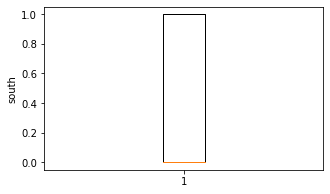

In [40]:
#Plotting Boxplot For south
plt.figure(figsize=(5,3))
plt.boxplot(org_data.south)
plt.ylabel("south")
plt.show()

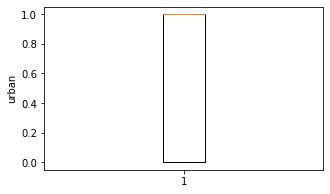

In [41]:
#Plotting Boxplot For urban
plt.figure(figsize=(5,3))
plt.boxplot(org_data.urban)
plt.ylabel("urban")
plt.show()

**Interpretation:** From the graphs we generated above, we can tell that most of the variables are normally distributed such as "lwage", "KWW", and "IQ". And most of the variables such as "lwage", "KWW", and "IQ" are spread almost equally, with only a few outliers.

## Correlation Plot

<AxesSubplot:>

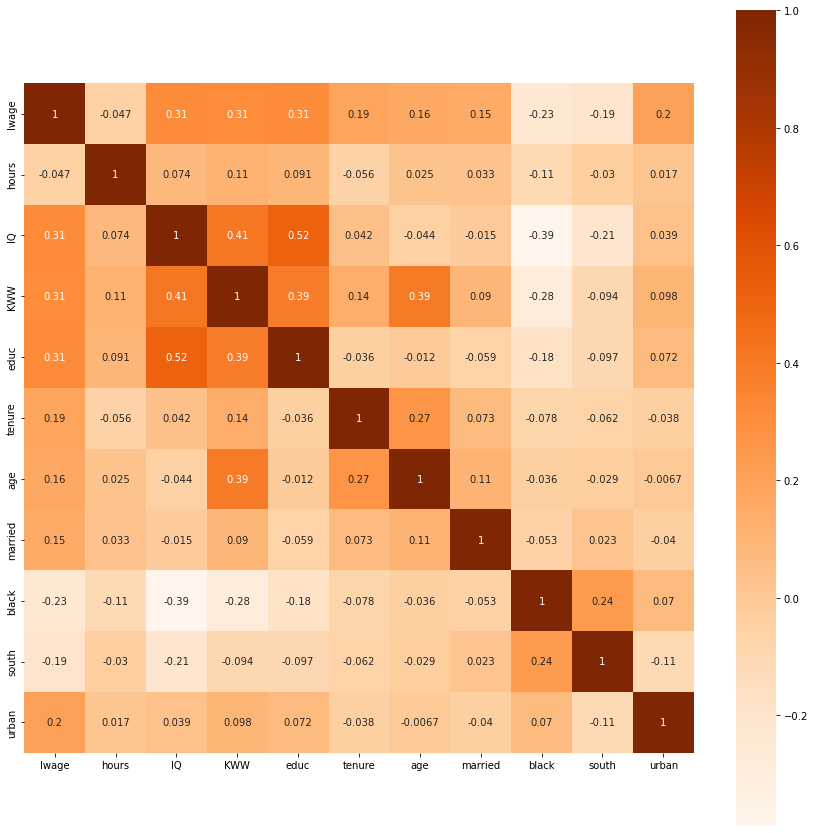

In [42]:
plt.figure(figsize=(15,15))
c = org_data[['lwage','hours','IQ','KWW','educ','tenure',
              'age','married','black','south','urban']].corr()
sns.heatmap(c,cmap="Oranges",annot=True,square = True)

**Interpretation:** From the correlation plot, we can see that some variables have relative strong correlation such as between IQ and KWW, between IQ and educ, between educ and KWW, between KWW and age, between IQ and black.

## Unusual Features

In [43]:
# Forming the Multiple Linear Regression Function with Every Variable

ols_mod = smf.ols(formula = 'lwage ~ hours+IQ+KWW+educ+tenure+age+married+\n black+south+urban',data=org_data)
ols_fit = ols_mod.fit()
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     34.10
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           9.87e-57
Time:                        16:46:04   Log-Likelihood:                -370.79
No. Observations:                 935   AIC:                             763.6
Df Residuals:                     924   BIC:                             816.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2893      0.186     28.384      0.000       4.924       5.655
hours         -0.0058      0.002     -3.492      0.001      -0.009      -0.003
IQ             0.0034      0.001      3.290      0.001       0.001       0.005
KWW            0.0034      0.002      1.669      0.095      -0.001       0.007
educ           0.0397      0.007      6.063      0.000       0.027       0.053
tenure         0.0109      0.002      4.458      0.000       0.006       0.016
age            0.0124      0.004      2.798      0.005       0.004       0.021
married        0.1989      0.039      5.119      0.000       0.123       0.275
black         -0.1408      0.040     -3.524      0.000      -0.219      -0.062
south         -0.0815      0.026     -3.113      0.002      -0.133      -0.030
urban          0.1769      0.027      6.581      0.000       0.124       0.230
==============================================================================
Omnibus:                       45.978   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.036
Skew:                          -0.222   Prob(JB):                     2.34e-26
Kurtosis:                       4.683   Cond. No.                     1.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# Studentized Residuals

studentized_resid = ols_fit.get_influence().resid_studentized
print(studentized_resid[:50])

[-0.28292628 -1.57923621 -0.83125579 -0.93367222 -0.9851397   0.90626165
  0.01660968 -0.94174493  0.75526599 -0.25333407 -0.90433959 -0.06371861
  0.60641829  0.70249191  0.96059518  0.43943181  0.47633321 -0.19130391
 -0.36598236 -1.7921019   0.62949204  0.94468009  0.17277081  1.14668663
 -0.26625233  1.23188778  0.53725489 -0.96144906  0.47067225 -1.76892107
  0.20172572  1.06400652  3.65001811 -1.23335675  0.81566779 -0.47714053
  1.63436939  0.58140278 -1.07290634 -0.21612195 -1.35129086 -0.03583515
  0.58537574 -0.54810423  0.73070517 -0.13601745 -1.17219535  0.3753413
  0.55637204 -0.74093129]


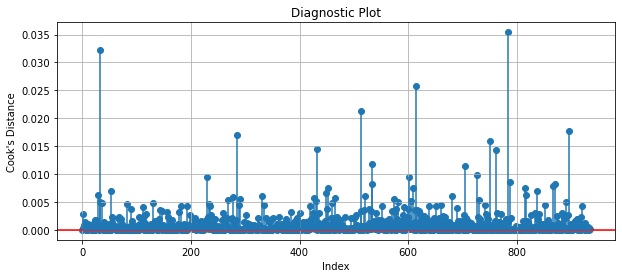

In [45]:
cooks_distance = ols_fit.get_influence().cooks_distance
plt.figure(figsize = (10, 4))
plt.scatter(org_data.index, cooks_distance[0])
plt.axhline(0, color = 'red')
plt.vlines(x = org_data.index, ymin = 0, ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title("Diagnostic Plot")
plt.grid(True)

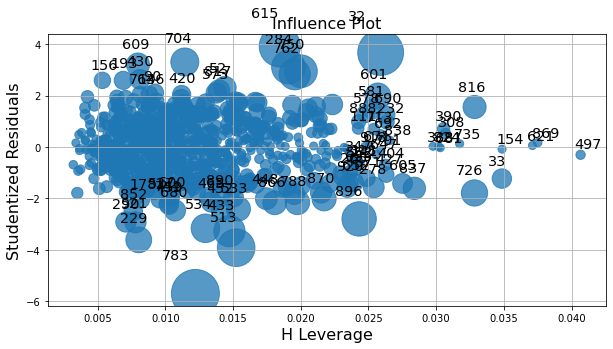

In [46]:
# Visualize the Influentials
fig, ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.influence_plot(ols_fit, ax = ax, criterion="cooks")
plt.grid()

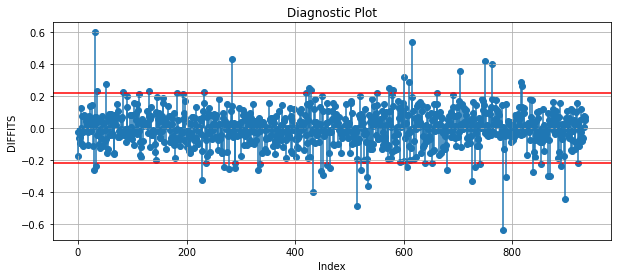

In [47]:
# the dffits attribute returns a cutoff and the diagnostic values
dffits, threshold = ols_fit.get_influence().dffits

plt.figure(figsize = (10, 4))
plt.scatter(org_data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = org_data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid(True)

In [48]:
# Drop observation greater than the cooks cutoff
mydata = org_data[cooks_distance[0]<4/len(cooks_distance[0])]

ols_new = smf.ols(formula = 'lwage ~ hours+IQ+KWW+educ+tenure+age+married+\n black+south+urban',data=mydata)
new_fit = ols_new.fit()

new_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     49.93
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           5.61e-79
Time:                        16:46:06   Log-Likelihood:                -186.63
No. Observations:                 881   AIC:                             395.3
Df Residuals:                     870   BIC:                             447.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2567      0.161     32.680      0.000       4.941       5.572
hours         -0.0053      0.002     -3.520      0.000      -0.008      -0.002
IQ             0.0031      0.001      3.470      0.001       0.001       0.005
KWW            0.0053      0.002      2.998      0.003       0.002       0.009
educ           0.0396      0.006      6.958      0.000       0.028       0.051
tenure         0.0106      0.002      5.019      0.000       0.006       0.015
age            0.0117      0.004      3.058      0.002       0.004       0.019
married        0.1984      0.035      5.677      0.000       0.130       0.267
black         -0.1480      0.035     -4.234      0.000      -0.217      -0.079
south         -0.0855      0.023     -3.783      0.000      -0.130      -0.041
urban          0.1860      0.023      8.031      0.000       0.141       0.231
==============================================================================
Omnibus:                        5.627   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                4.223
Skew:                          -0.023   Prob(JB):                        0.121
Kurtosis:                       2.664   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

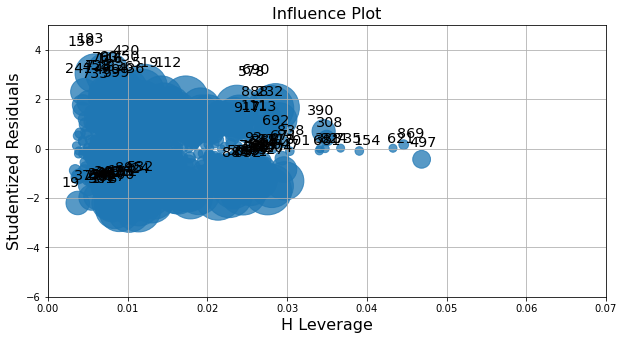

In [49]:
# Visualize the Influentials
fig, ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.influence_plot(new_fit, ax = ax, criterion="cooks")
plt.xlim(0, 0.07)
plt.ylim(-6, 5)
plt.grid()

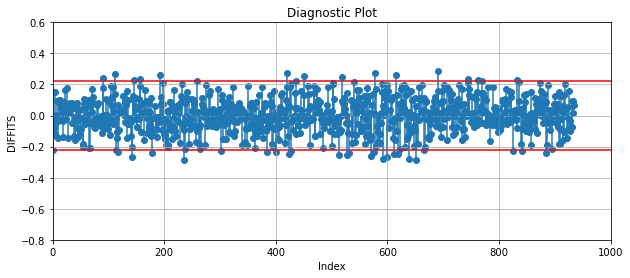

In [50]:
dffits1, threshold1 = new_fit.get_influence().dffits

plt.figure(figsize = (10, 4))
plt.scatter(mydata.index, dffits1)
plt.axhline(threshold1, color = 'red')
plt.axhline(-threshold1, color = 'red')
plt.vlines(x = mydata.index, ymin = 0, ymax = dffits1)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.xlim(0, 1000)
plt.ylim(-0.8, 0.6)
plt.grid(True)

# Non-linearities and Transformations
##  Test for Non-linearities

To detect nonlinearity we inspected plots of observed vs. predicted values or residuals vs. predicted values. 
The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or around a horizontal line in the latter one. 

In [51]:
mydata.describe()

wage       hours          IQ         KWW        educ  \
count   881.000000  881.000000  881.000000  881.000000  881.000000   
mean    958.634506   43.752554  101.237230   35.762770   13.459705   
std     367.016689    6.842884   14.926236    7.606324    2.195765   
min     345.000000   20.000000   50.000000   12.000000    9.000000   
25%     692.000000   40.000000   92.000000   31.000000   12.000000   
50%     910.000000   40.000000  102.000000   37.000000   12.000000   
75%    1155.000000   46.000000  112.000000   41.000000   16.000000   
max    2771.000000   80.000000  145.000000   56.000000   18.000000   

            exper      tenure         age     married       black       south  \
count  881.000000  881.000000  881.000000  881.000000  881.000000  881.000000   
mean    11.591373    7.384790   33.095346    0.904654    0.122588    0.332577   
std      4.374110    5.044862    3.092144    0.293859    0.328150    0.471404   
min      1.000000    0.000000   28.000000    0.000000    0.000000    0.000000   
25%      8.000000    3.000000   30.000000    1.000000    0.000000    0.000000   
50%     11.000000    7.000000   33.000000    1.000000    0.000000    0.000000   
75%     15.000000   11.000000   36.000000    1.000000    0.000000    1.000000   
max     23.000000   22.000000   38.000000    1.000000    1.000000    1.000000   

            urban        sibs     brthord       meduc       feduc       lwage  
count  881.000000  881.000000  881.000000  881.000000  881.000000  881.000000  
mean     0.720772    2.937571    2.265858   10.689518   10.221957    6.795618  
std      0.448875    2.307982    1.516325    2.712602    2.930480    0.375408  
min      0.000000    0.000000    1.000000    0.000000    0.000000    5.843544  
25%      0.000000    1.000000    1.000000    9.000000    8.000000    6.539586  
50%      1.000000    2.000000    2.000000   12.000000   10.217274    6.813445  
75%      1.000000    4.000000    3.000000   12.000000   12.000000    7.051856  
max      1.000000   14.000000   10.000000   18.000000   18.000000    7.926963

In [52]:
mydata.columns

Index(['wage', 'hours', 'IQ', 'KWW', 'educ', 'exper', 'tenure', 'age',
       'married', 'black', 'south', 'urban', 'sibs', 'brthord', 'meduc',
       'feduc', 'lwage'],
      dtype='object')

In [53]:
# Attach Data Set

def attach(mydata):
    for col in mydata.columns:
        globals()[col] = mydata[col]

mydata = pd.DataFrame(mydata)
attach(mydata)

In [54]:
## packages used
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import statsmodels.stats.api as sms
import statsmodels.api as sm
import pylab as py

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

In [55]:
## set X and Y
X = pd.DataFrame(mydata, columns=['hours', 'IQ', 'KWW', 'educ', 'exper', 'tenure', 'age','married', 
                                  'black', 'south', 'urban', 'brthord', 'meduc','feduc'])
Y = pd.DataFrame(mydata,columns=['lwage'])

## regression
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(Y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     36.79
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           4.51e-78
Time:                        16:46:09   Log-Likelihood:                -180.84
No. Observations:                 881   AIC:                             391.7
Df Residuals:                     866   BIC:                             463.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2315      0.166     31.579      0.000       4.906       5.557
hours         -0.0053      0.001     -3.550      0.000      -0.008      -0.002
IQ             0.0028      0.001      3.108      0.002       0.001       0.005
KWW            0.0050      0.002      2.809      0.005       0.001       0.008
educ           0.0427      0.007      6.550      0.000       0.030       0.056
exper          0.0075      0.003      2.401      0.017       0.001       0.014
tenure         0.0101      0.002      4.751      0.000       0.006       0.014
age            0.0076      0.004      1.742      0.082      -0.001       0.016
married        0.1950      0.035      5.596      0.000       0.127       0.263
black         -0.1438      0.035     -4.121      0.000      -0.212      -0.075
south         -0.0797      0.023     -3.517      0.000      -0.124      -0.035
urban          0.1848      0.023      7.988      0.000       0.139       0.230
brthord       -0.0065      0.007     -0.939      0.348      -0.020       0.007
meduc          0.0057      0.005      1.246      0.213      -0.003       0.015
feduc          0.0038      0.004      0.902      0.367      -0.005       0.012
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                2.067
Skew:                          -0.024   Prob(JB):                        0.356
Kurtosis:                       2.768   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

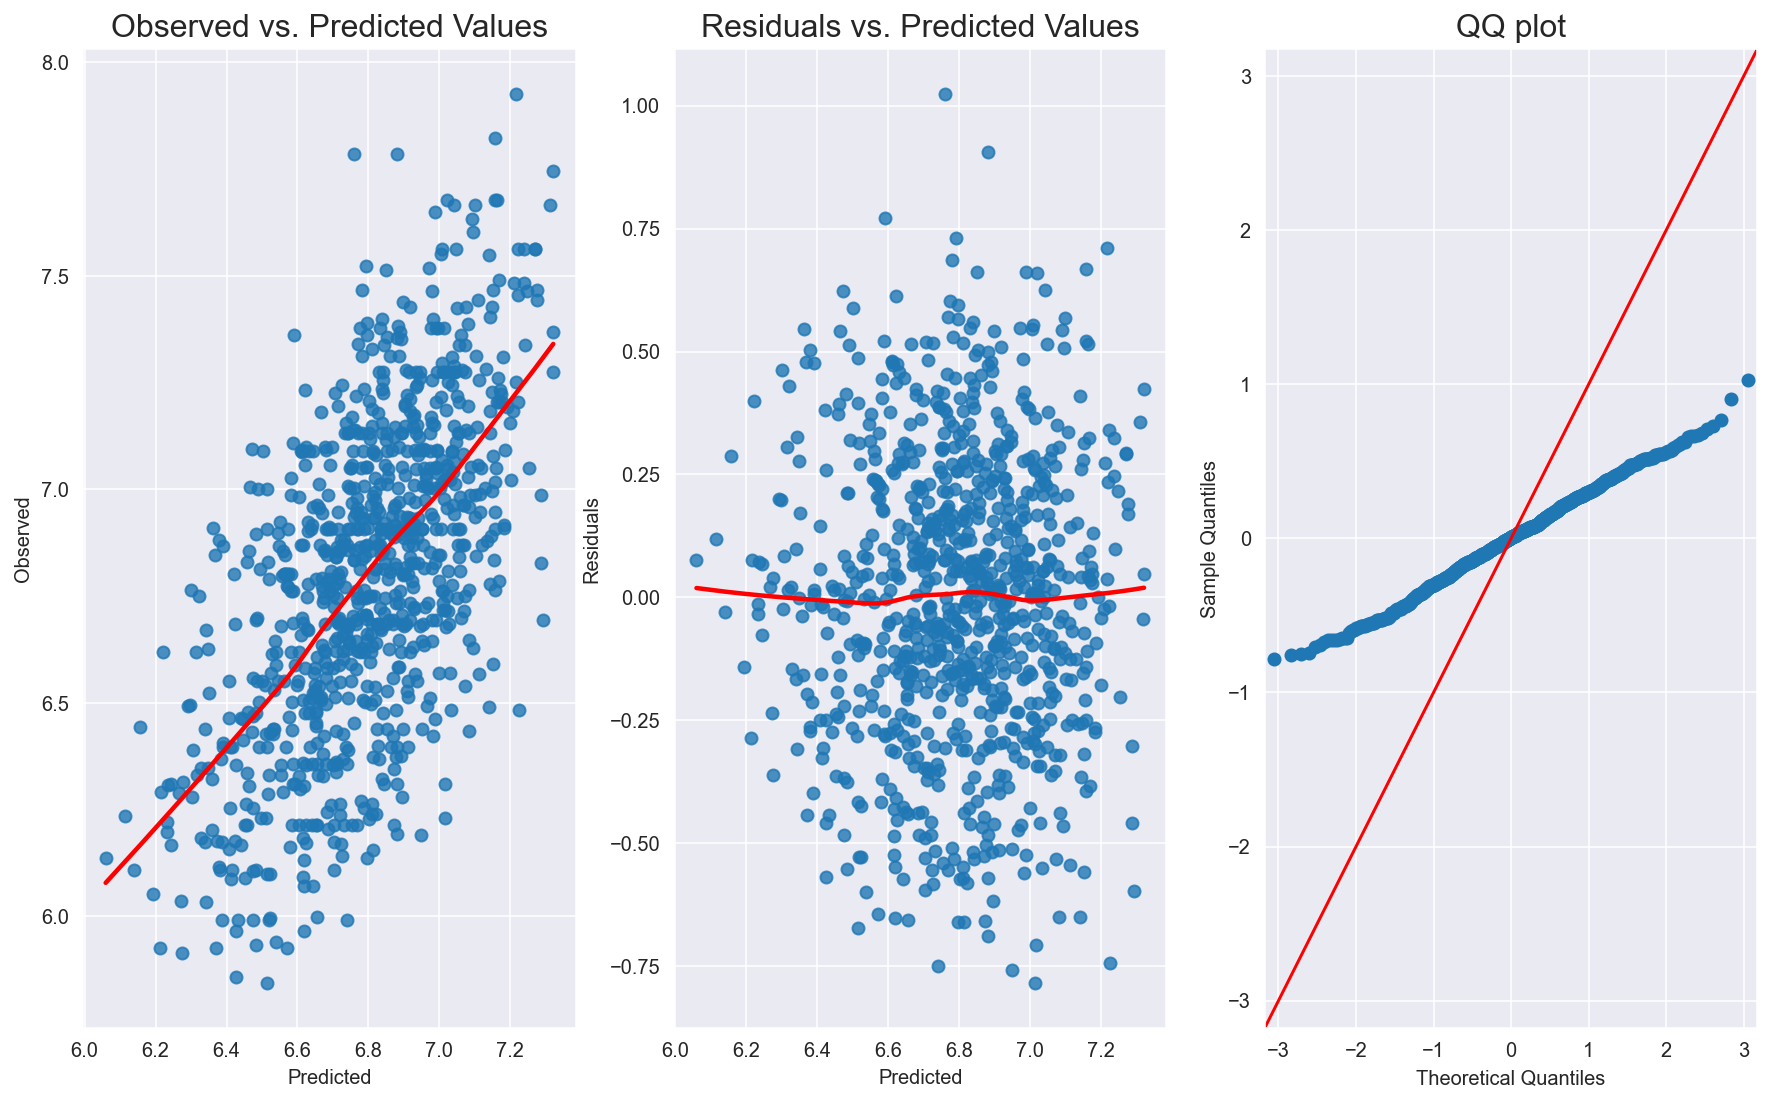

In [56]:
def linearity_test(model, y):
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,3)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
    sm.qqplot(resids, line ='45', ax=ax[2])
    ax[2].set_title('QQ plot', fontsize=16)
    ax[2].set(xlabel='Theoretical Quantiles', ylabel='Sample Quantiles')

def R_result(results):
    print("original R-Squared equals to %s" % results.rsquared)
    
linearity_test(lin_reg, Y)  



original R-Squared equals to 0.9725641818016928


0.16418762655948382

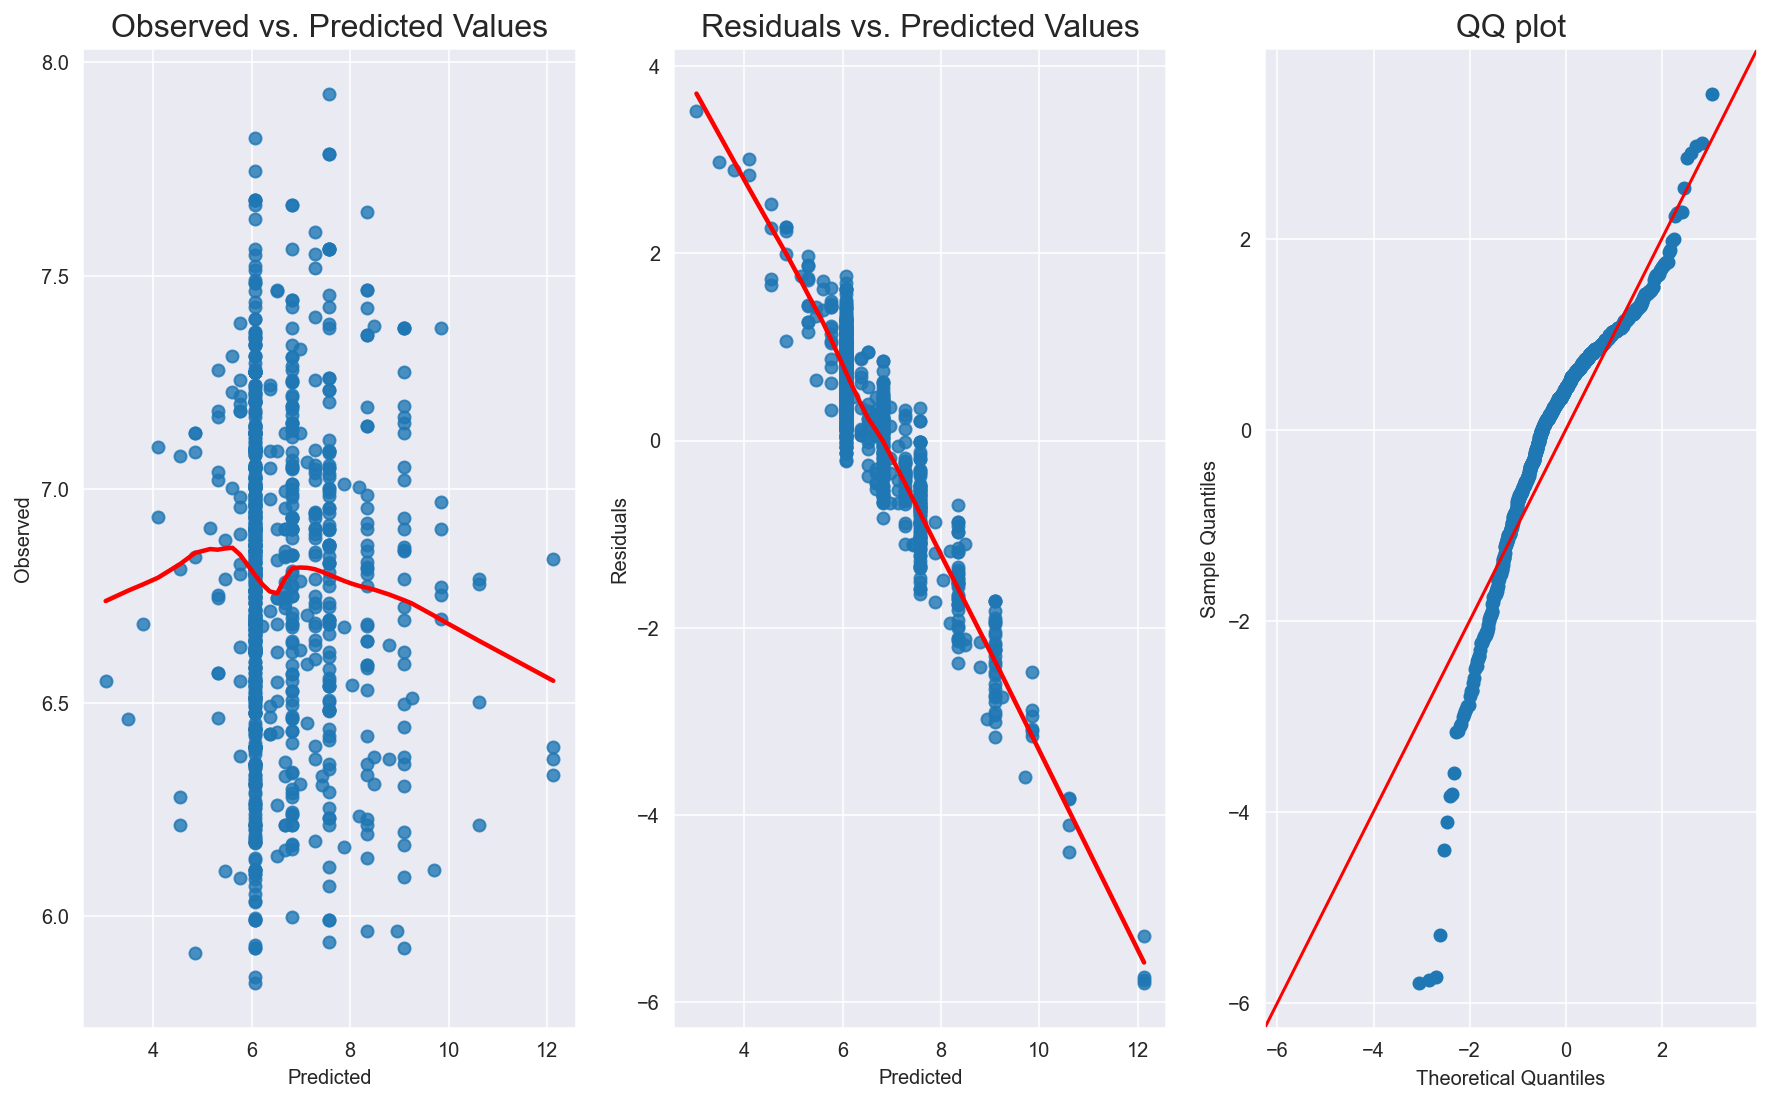

In [57]:
# testing non-linearity for average weekly hours
X1 = pd.DataFrame(hours)
Y1 = pd.DataFrame(lwage)
reg_hours = sm.OLS(Y1,X1).fit()
R_result(reg_hours)
linearity_test(reg_hours, Y1)  
reg_hours.summary()
reg_hours.resid.mean()

The inspection of the plots shows that the linearity assumption is not satisfied.

original R-Squared equals to 0.981689437824774


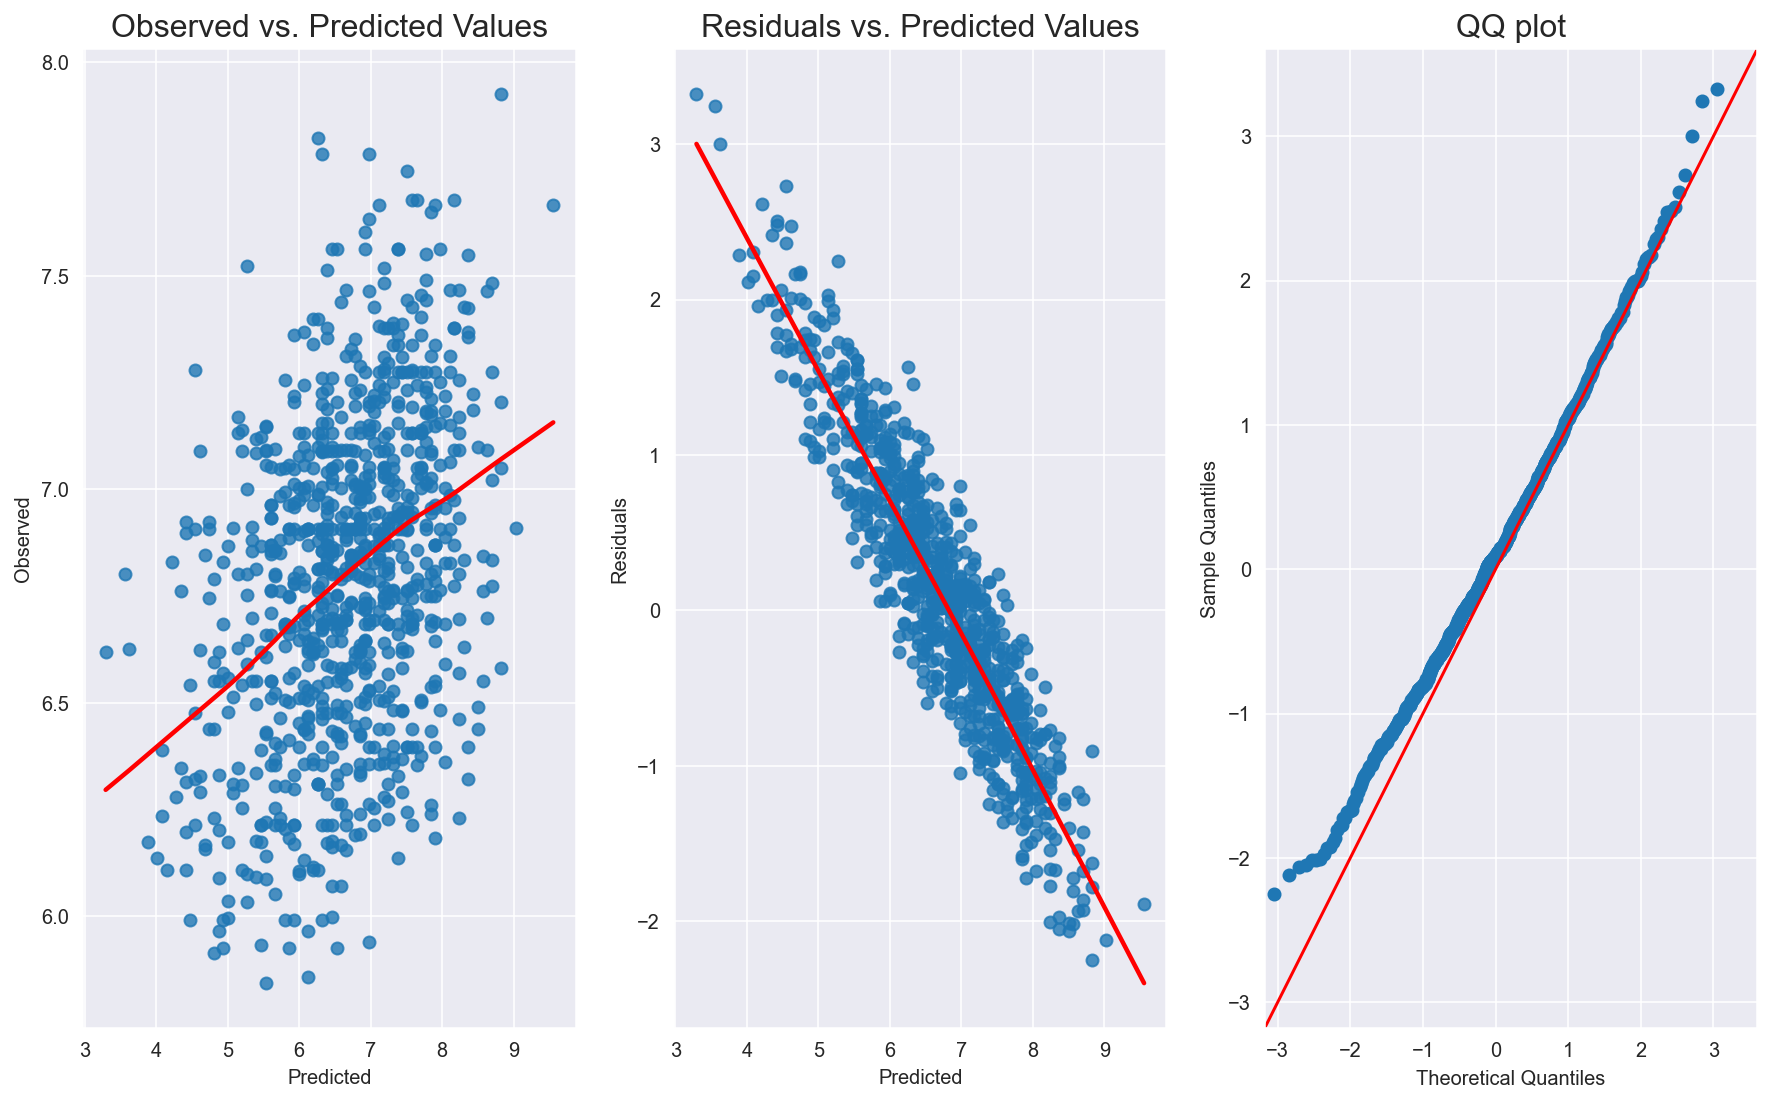

In [58]:
# testing non-linearity for IQ score
X2 = pd.DataFrame(IQ)
Y2 = pd.DataFrame(lwage)
reg_IQ = sm.OLS(Y2,X2).fit()
R_result(reg_IQ)
linearity_test(reg_IQ, Y2)  

The inspection of the plots shows that the linearity assumption is satisfied.

original R-Squared equals to 0.9625943584362175


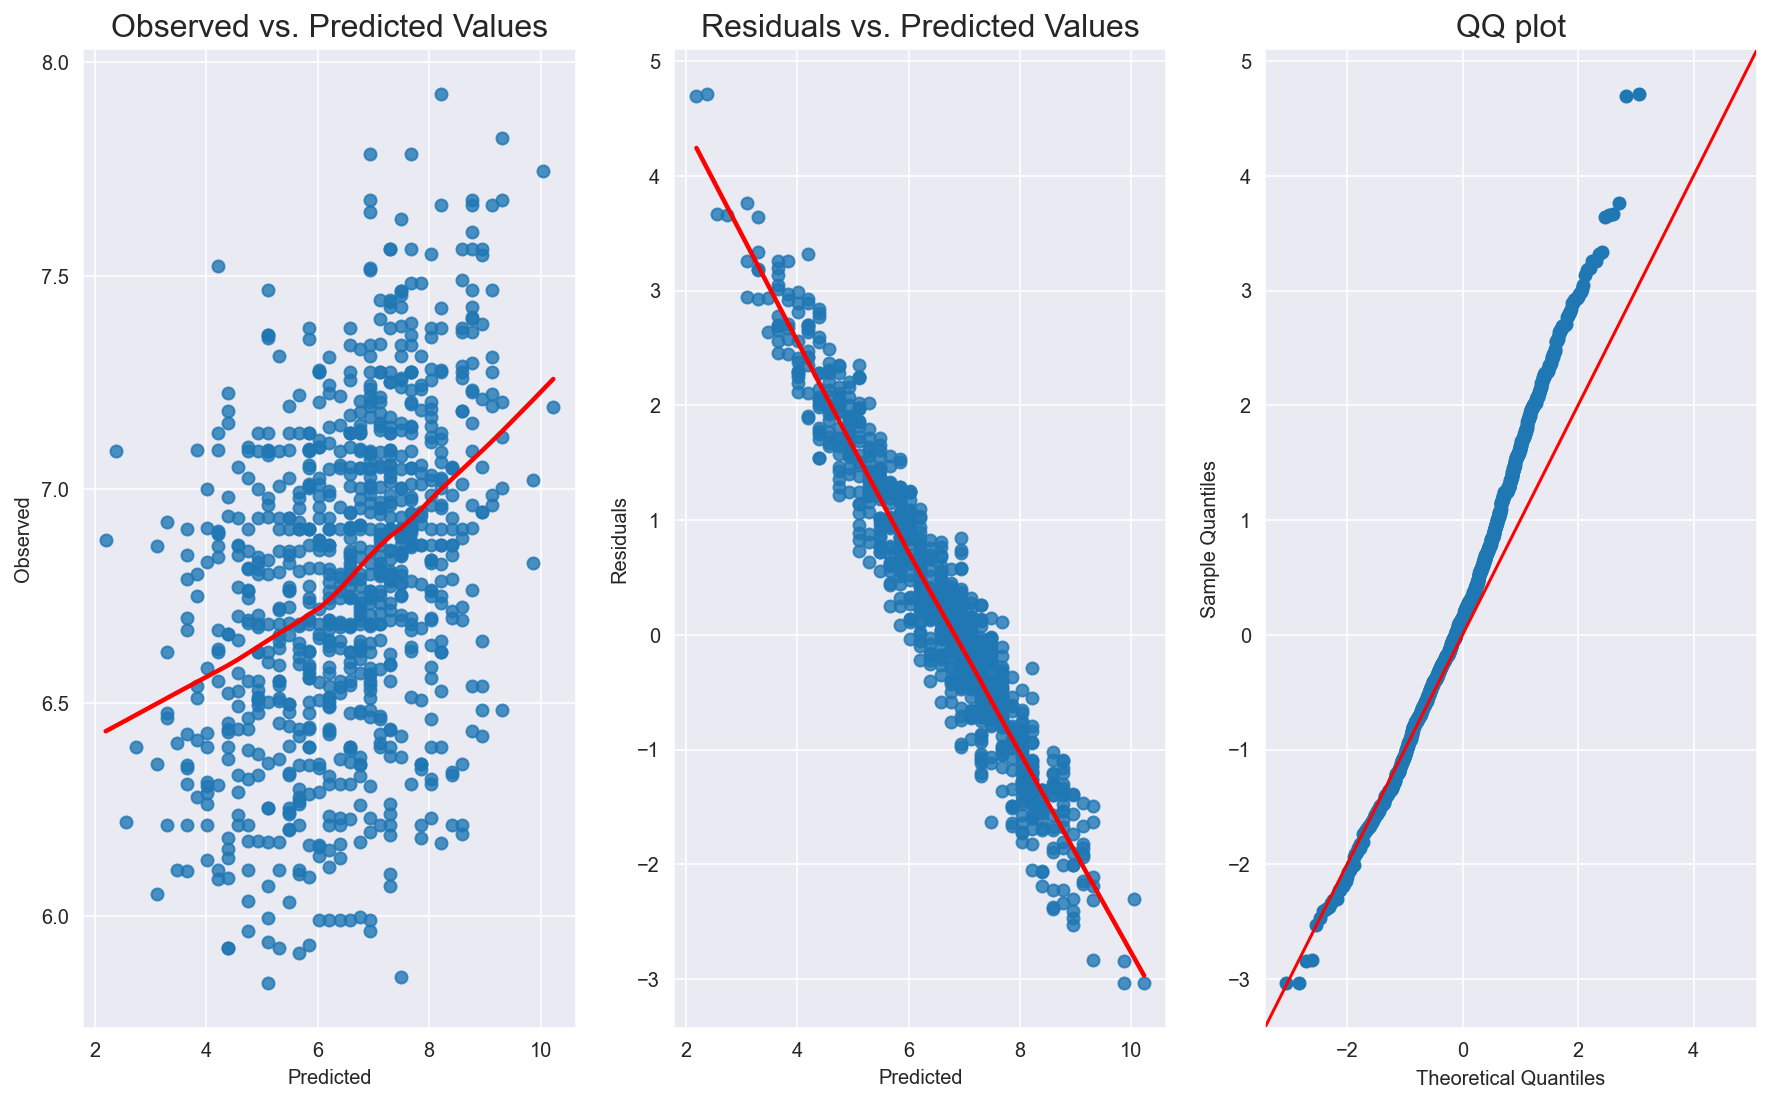

In [59]:
# testing non-linearity for knowledge of world work score
X3 = pd.DataFrame(KWW)
Y3 = pd.DataFrame(lwage)
reg_KWW = sm.OLS(Y3,X3).fit()
R_result(reg_KWW)
linearity_test(reg_KWW, Y3)  

original R-Squared equals to 0.9776143523119646


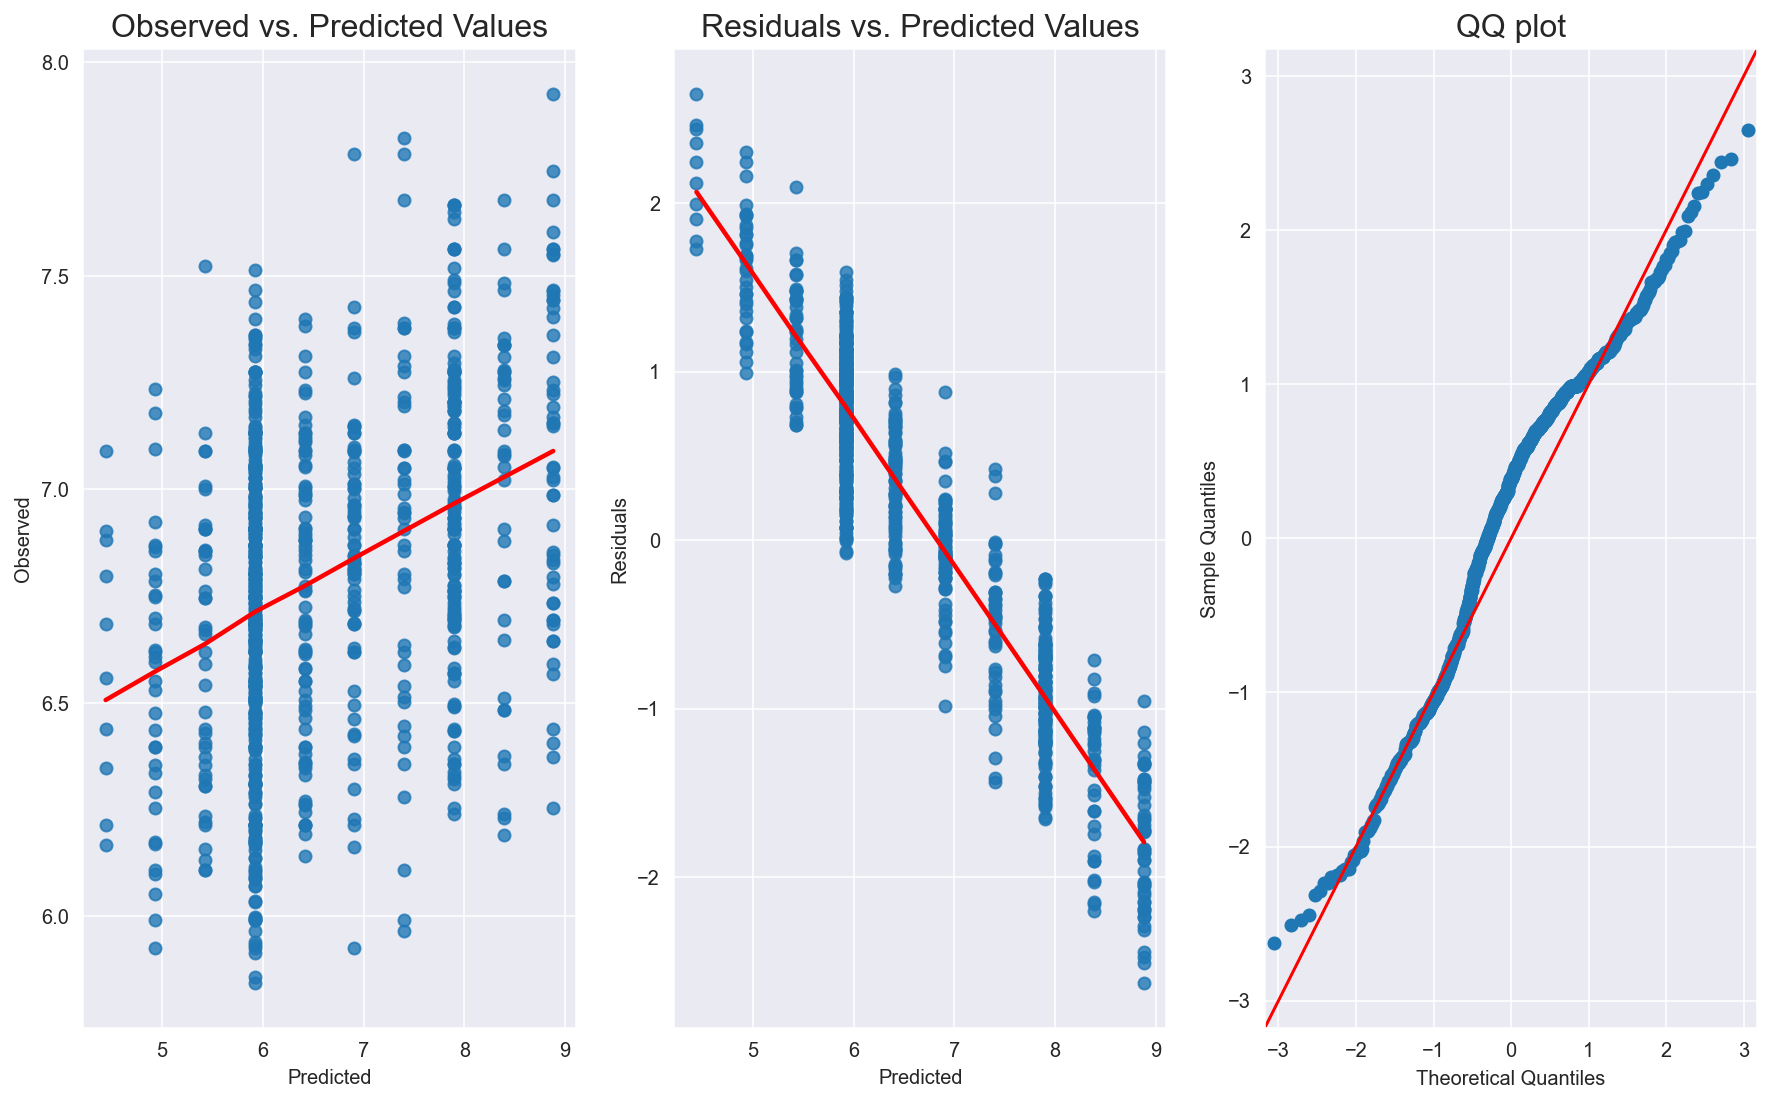

In [60]:
# testing non-linearity for knowledge of years of education
X4 = pd.DataFrame(educ)
Y4 = pd.DataFrame(lwage)
reg_educ = sm.OLS(Y4,X4).fit()
R_result(reg_educ)
linearity_test(reg_educ, Y4)  

original R-Squared equals to 0.690338127554804


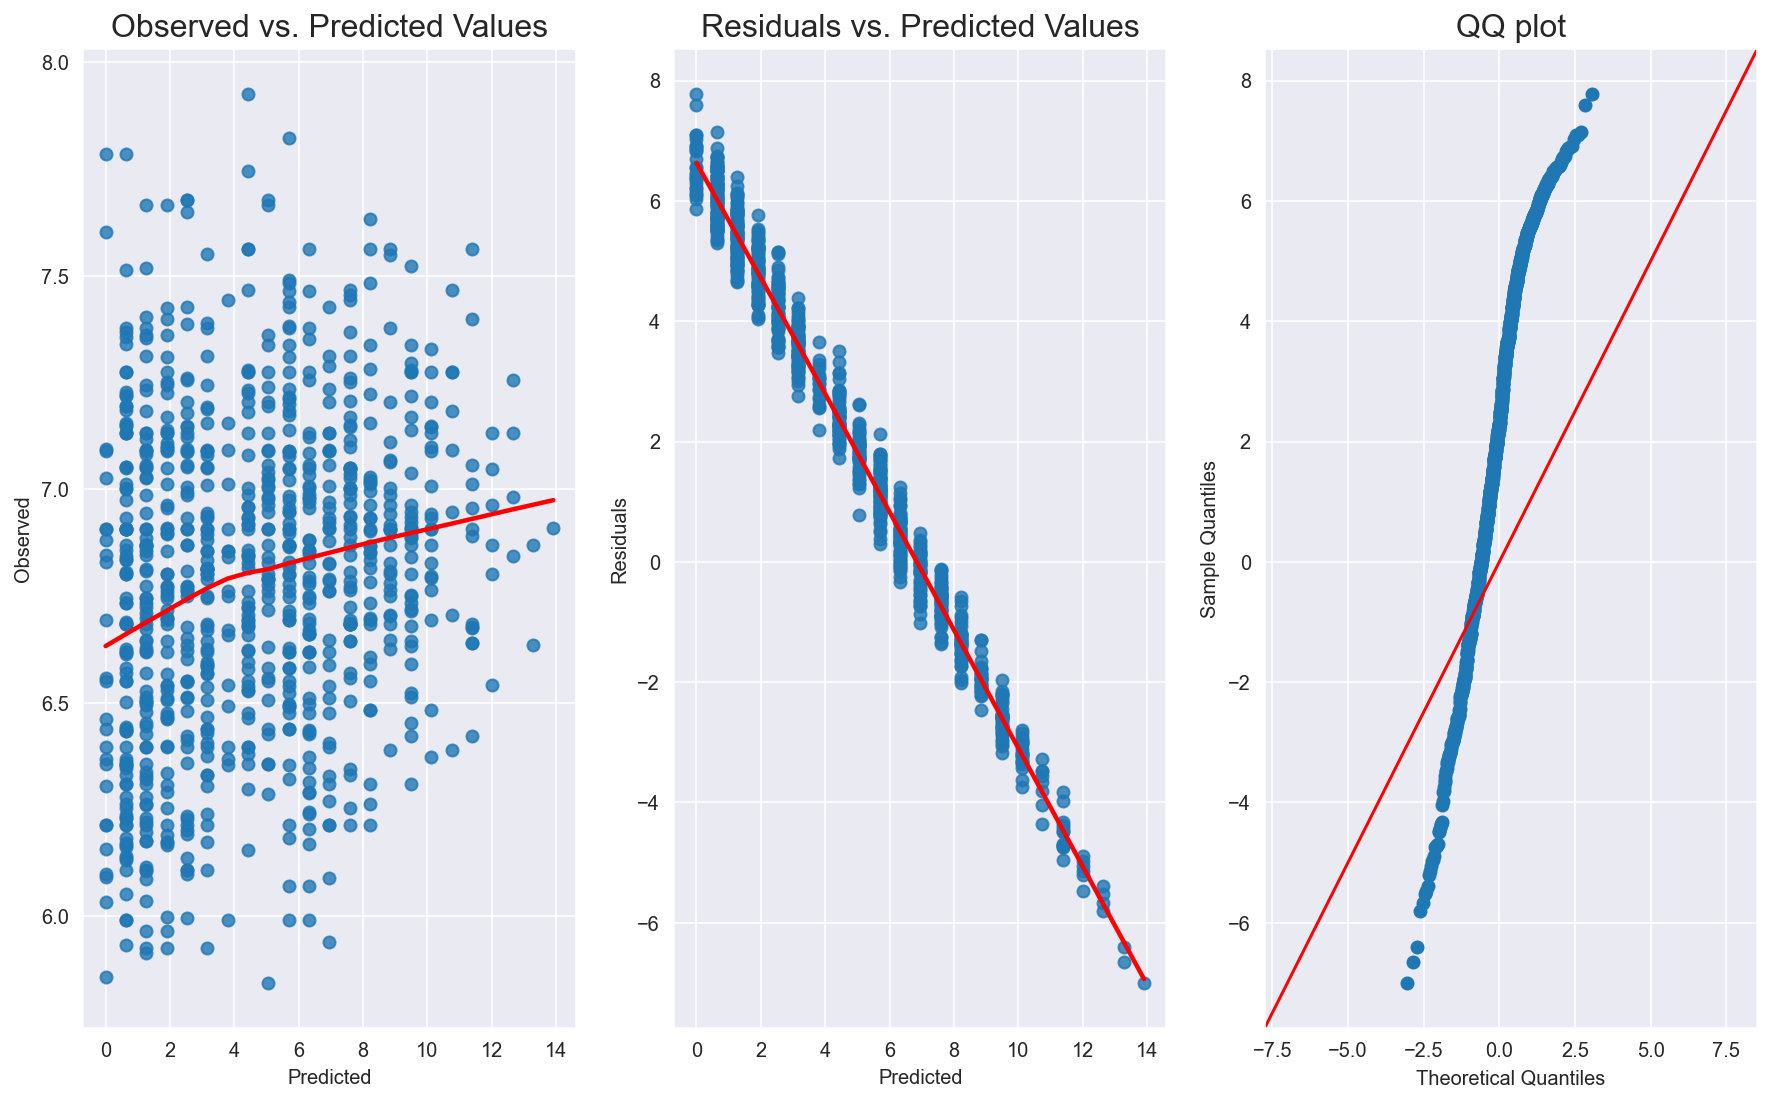

In [61]:
# testing non-linearity for years with current employer
X6 = pd.DataFrame(tenure)
Y6 = pd.DataFrame(lwage)
reg_tenure = sm.OLS(Y6,X6).fit()
R_result(reg_tenure)
linearity_test(reg_tenure, Y)  

original R-Squared equals to 0.9903902907277963


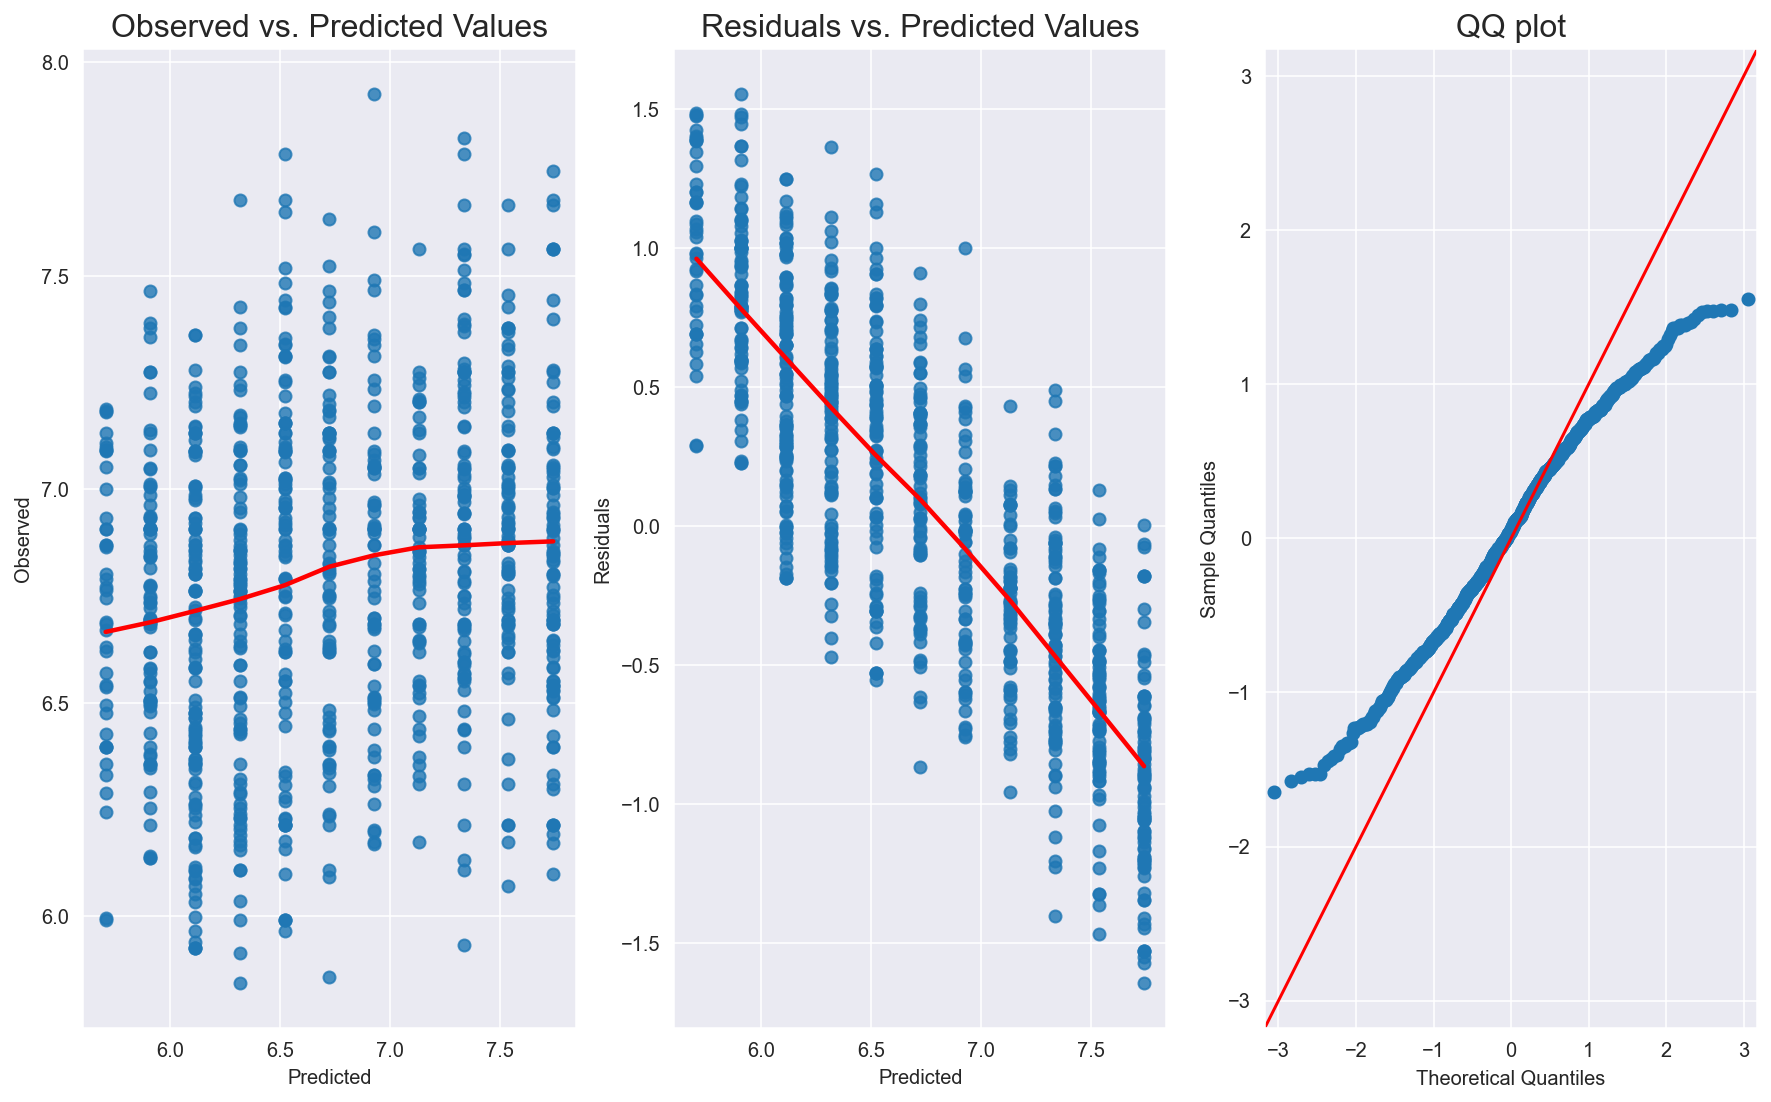

In [62]:
# testing non-linearity for age in years
X7 = pd.DataFrame(age)
Y7 = pd.DataFrame(lwage)
reg_age = sm.OLS(Y7,X7).fit()
R_result(reg_age)
linearity_test(reg_age, Y)  

**Interpretaion:** The inspection of the plots shows that the linearity assumption is not satisfied for several variables. Combining the histograms, we decided to transform the data for hours, educ, tenure and age.

## Transformations

We address Box-Cox Power Transform, log transformation and qua to help meet linearity.

In [63]:
## set bc_test, plot results and append values after transformation
def bc_test(x,title):
    
    bc_x, lambda_x = stats.boxcox(x)
    bc_x = pd.DataFrame(bc_x)
    mydata[title]=bc_x
    print("lambda = %s" % lambda_x)

    fig, ax = plt.subplots(1,2)

    sns.histplot(x,ax=ax[0])
    plt.title("Original")
    sns.histplot(bc_x)
    plt.title("Box-Cos Transformed:" +title)

lambda = -0.7703323047121717


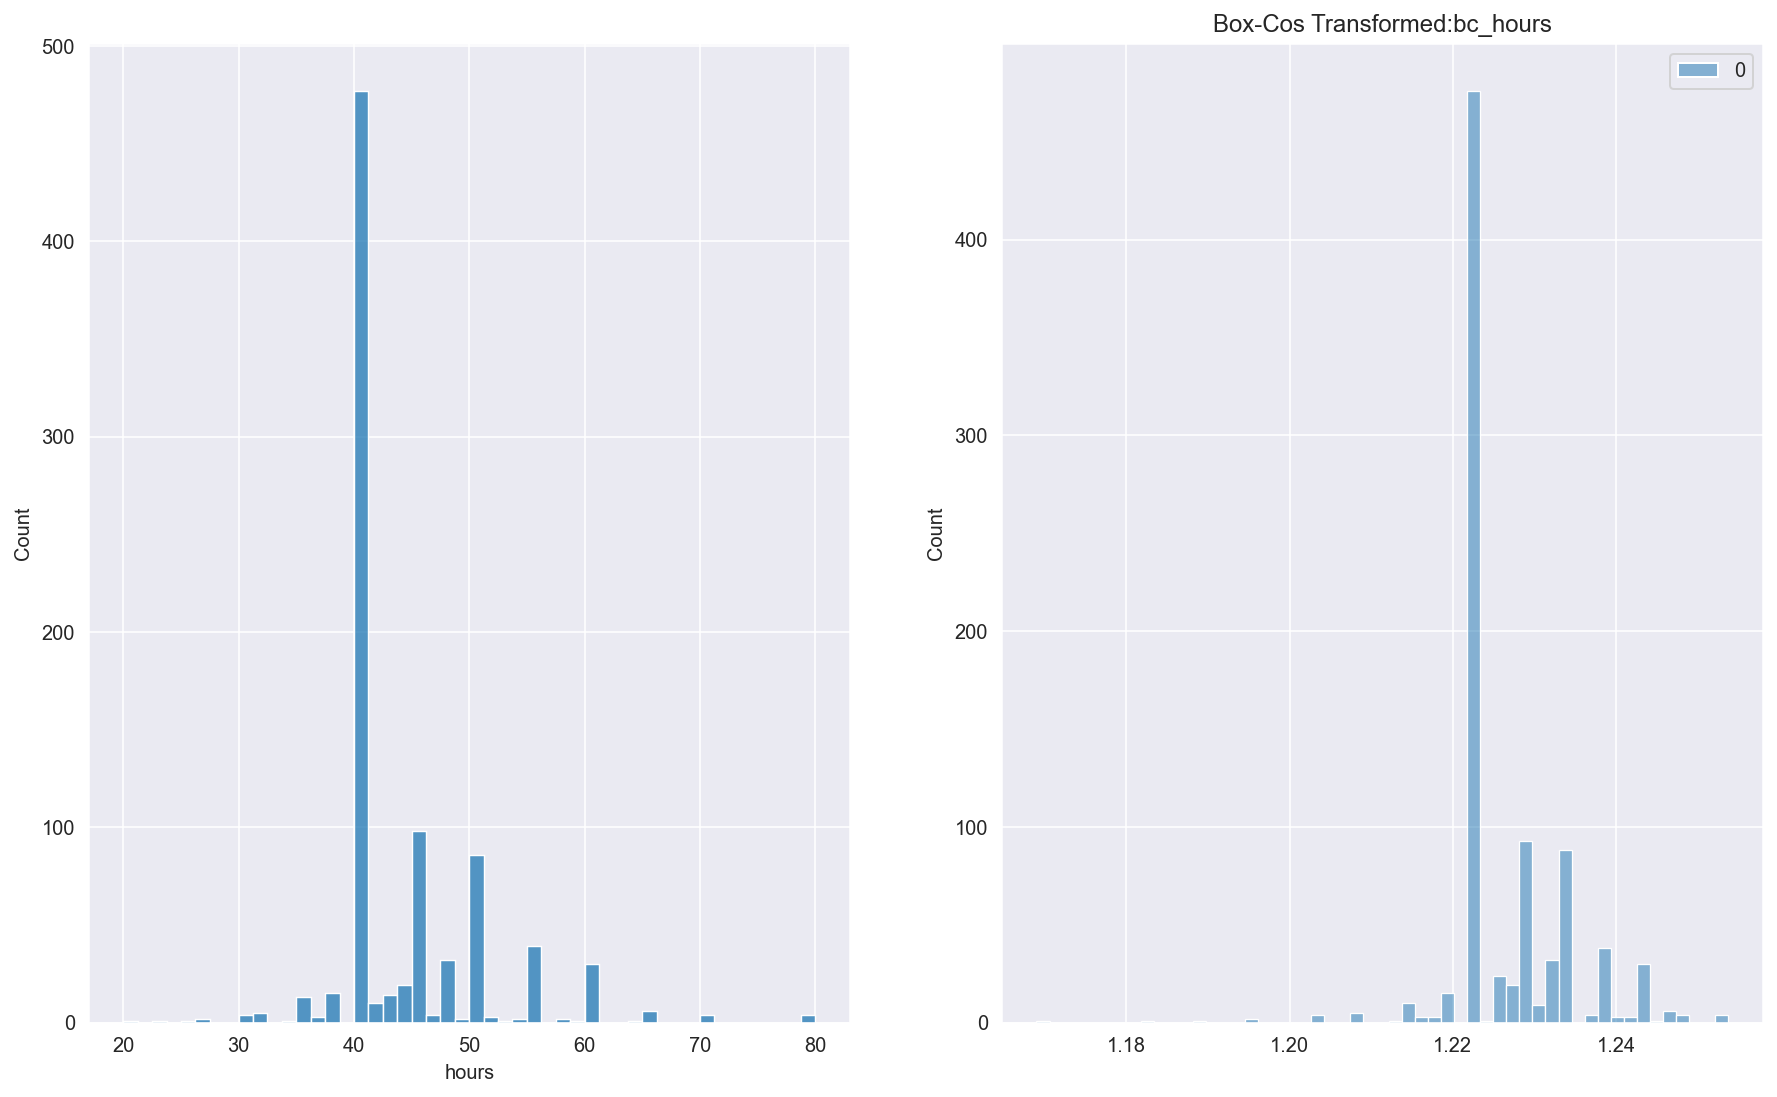

In [64]:
## Boxplot results for hours
bc_test(hours,'bc_hours')

lambda = -0.7749679550118613


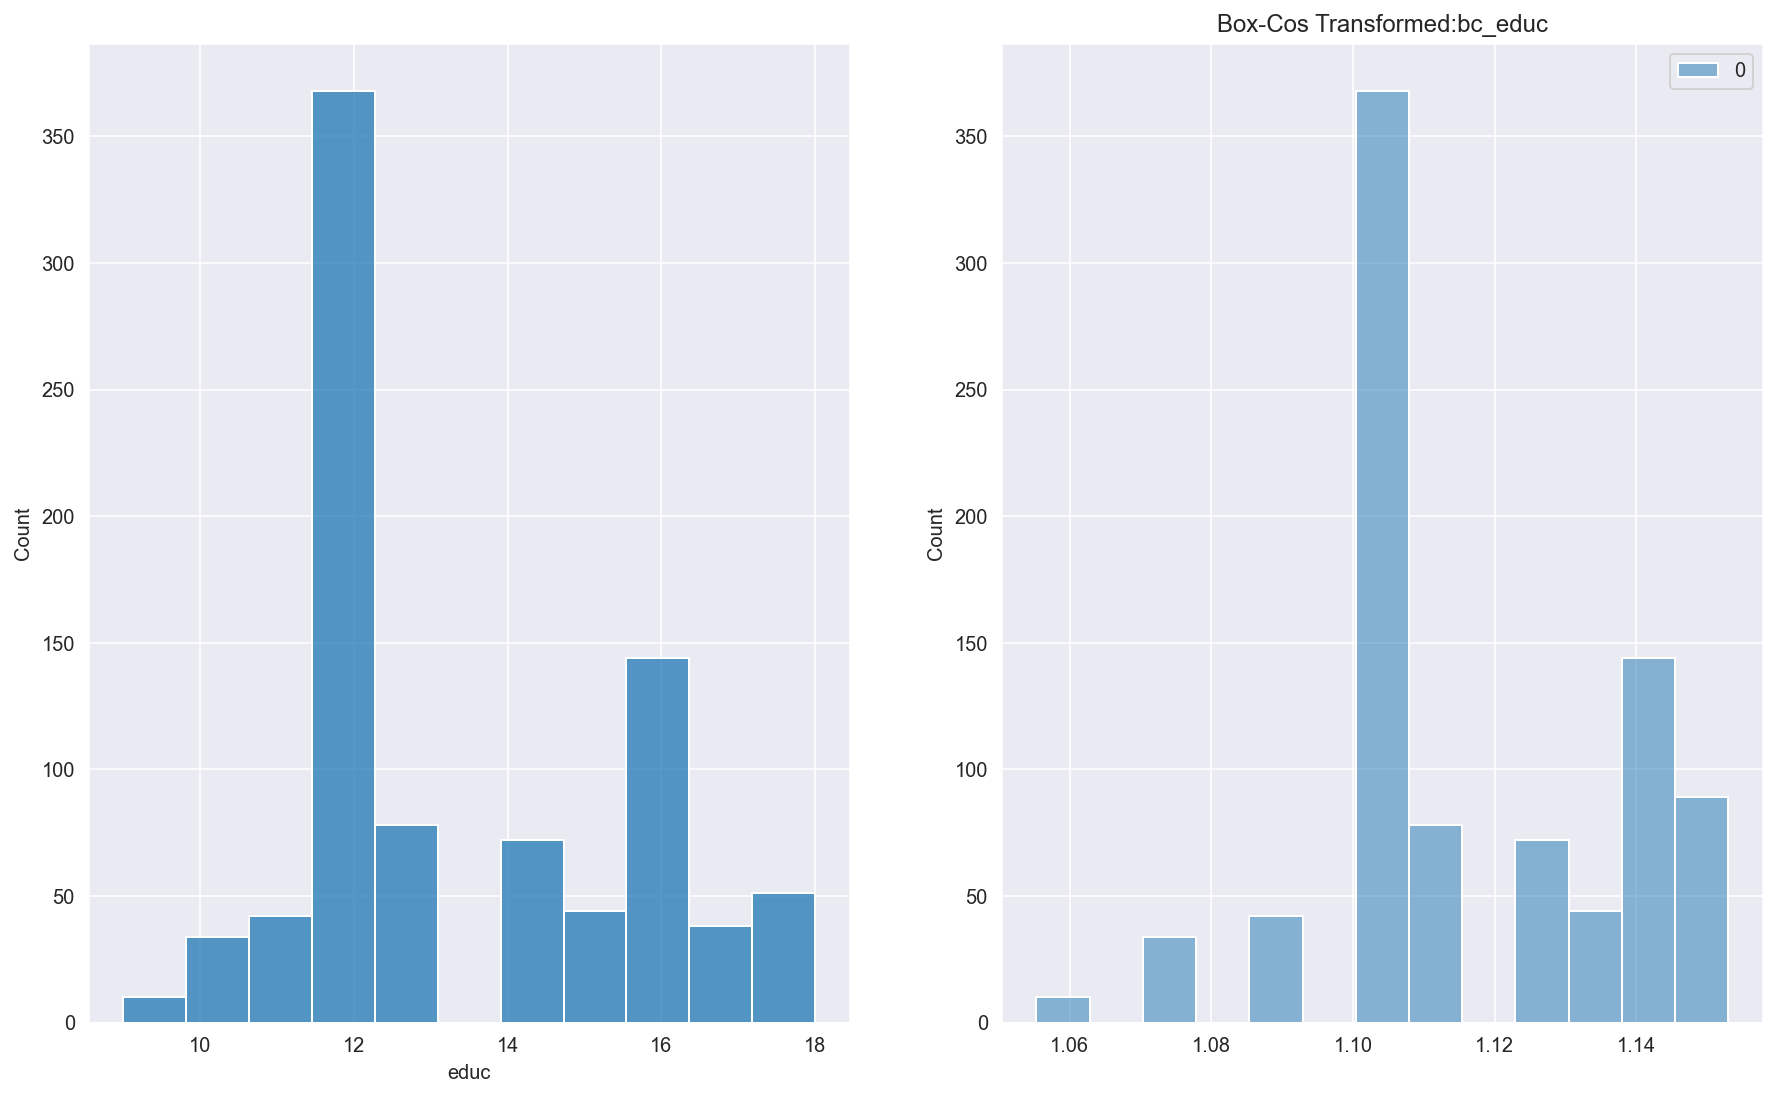

In [65]:
## Boxplot results for educ
bc_test(educ,'bc_educ')

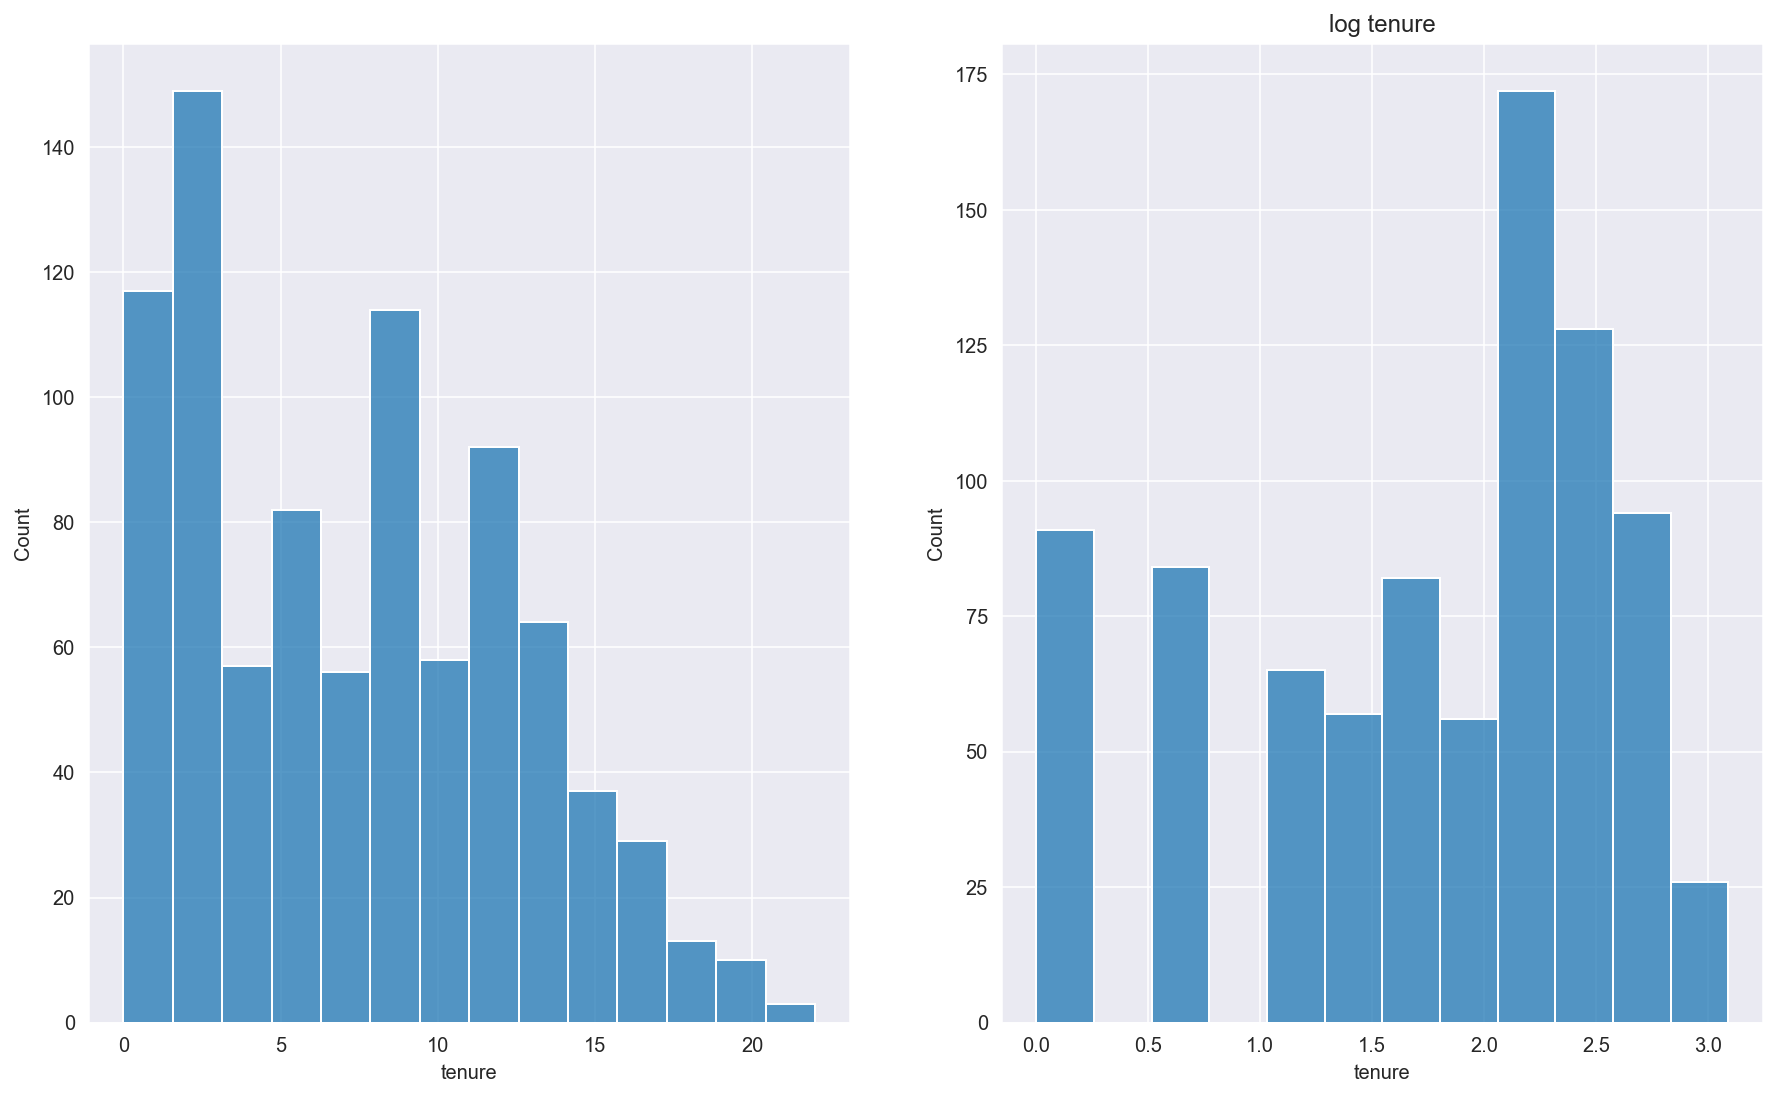

In [66]:
## Box-Cox cannot be used in this case since value tenure contains 0. Thus introduce log transformation
fig, ax = plt.subplots(1,2)
sns.histplot(tenure,ax=ax[0])
plt.title("Original")
sns.histplot(np.log(tenure),ax=ax[1])
plt.title("log tenure")
mydata['ltenure']= np.log(tenure)

In [67]:
## mydata after transformation
mydata.describe()

wage       hours          IQ         KWW        educ  \
count   881.000000  881.000000  881.000000  881.000000  881.000000   
mean    958.634506   43.752554  101.237230   35.762770   13.459705   
std     367.016689    6.842884   14.926236    7.606324    2.195765   
min     345.000000   20.000000   50.000000   12.000000    9.000000   
25%     692.000000   40.000000   92.000000   31.000000   12.000000   
50%     910.000000   40.000000  102.000000   37.000000   12.000000   
75%    1155.000000   46.000000  112.000000   41.000000   16.000000   
max    2771.000000   80.000000  145.000000   56.000000   18.000000   

            exper      tenure         age     married       black       south  \
count  881.000000  881.000000  881.000000  881.000000  881.000000  881.000000   
mean    11.591373    7.384790   33.095346    0.904654    0.122588    0.332577   
std      4.374110    5.044862    3.092144    0.293859    0.328150    0.471404   
min      1.000000    0.000000   28.000000    0.000000    0.000000    0.000000   
25%      8.000000    3.000000   30.000000    1.000000    0.000000    0.000000   
50%     11.000000    7.000000   33.000000    1.000000    0.000000    0.000000   
75%     15.000000   11.000000   36.000000    1.000000    0.000000    1.000000   
max     23.000000   22.000000   38.000000    1.000000    1.000000    1.000000   

            urban        sibs     brthord       meduc       feduc       lwage  \
count  881.000000  881.000000  881.000000  881.000000  881.000000  881.000000   
mean     0.720772    2.937571    2.265858   10.689518   10.221957    6.795618   
std      0.448875    2.307982    1.516325    2.712602    2.930480    0.375408   
min      0.000000    0.000000    1.000000    0.000000    0.000000    5.843544   
25%      0.000000    1.000000    1.000000    9.000000    8.000000    6.539586   
50%      1.000000    2.000000    2.000000   12.000000   10.217274    6.813445   
75%      1.000000    4.000000    3.000000   12.000000   12.000000    7.051856   
max      1.000000   14.000000   10.000000   18.000000   18.000000    7.926963   

         bc_hours     bc_educ     ltenure  
count  830.000000  830.000000  881.000000  
mean     1.226510    1.115131        -inf  
std      0.007786    0.021351         NaN  
min      1.168990    1.055300        -inf  
25%      1.222422    1.102277    1.098612  
50%      1.222422    1.102277    1.945910  
75%      1.230151    1.139867    2.397895  
max      1.253749    1.152997    3.091042

In [68]:
mydata.isnull().sum()

wage         0
hours        0
IQ           0
KWW          0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
south        0
urban        0
sibs         0
brthord      0
meduc        0
feduc        0
lwage        0
bc_hours    51
bc_educ     51
ltenure      0
dtype: int64

In [69]:
# Replace Null Value With Mean
m_h = mydata['bc_hours'].mean()
mydata['bc_hours'].fillna(value=m_h,inplace=True)

m_ed = mydata['bc_educ'].mean()
mydata['bc_educ'].fillna(value=m_ed,inplace=True)

m_k = mydata['KWW'].mean()
mydata['KWW'].fillna(value=m_k,inplace=True)

mydata.replace([-np.inf], 0, inplace=True)

In [70]:
mydata.isnull().any()

wage        False
hours       False
IQ          False
KWW         False
educ        False
exper       False
tenure      False
age         False
married     False
black       False
south       False
urban       False
sibs        False
brthord     False
meduc       False
feduc       False
lwage       False
bc_hours    False
bc_educ     False
ltenure     False
dtype: bool

In [71]:
Y_new = mydata['lwage']
X_new = mydata[['bc_hours', 'bc_educ','ltenure','IQ', 'KWW', 'married','age', 
                                  'black', 'south', 'urban']]
X_new = sm.add_constant(X_new)
model = sm.OLS(Y_new,X_new)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     42.26
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           2.86e-68
Time:                        16:46:16   Log-Likelihood:                -212.04
No. Observations:                 881   AIC:                             446.1
Df Residuals:                     870   BIC:                             498.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7486      1.746      2.147      0.032       0.322       7.175
bc_hours       0.8798      1.394      0.631      0.528      -1.857       3.616
bc_educ        0.3761      0.509      0.739      0.460      -0.623       1.375
ltenure        0.0625      0.012      5.252      0.000       0.039       0.086
IQ             0.0056      0.001      6.609      0.000       0.004       0.007
KWW            0.0082      0.002      4.705      0.000       0.005       0.012
married        0.1803      0.036      5.020      0.000       0.110       0.251
age            0.0099      0.004      2.551      0.011       0.002       0.018
black         -0.1234      0.036     -3.443      0.001      -0.194      -0.053
south         -0.0814      0.023     -3.502      0.000      -0.127      -0.036
urban          0.1897      0.024      7.957      0.000       0.143       0.237
==============================================================================
Omnibus:                        3.688   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                3.014
Skew:                           0.019   Prob(JB):                        0.222
Kurtosis:                       2.716   Cond. No.                     2.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

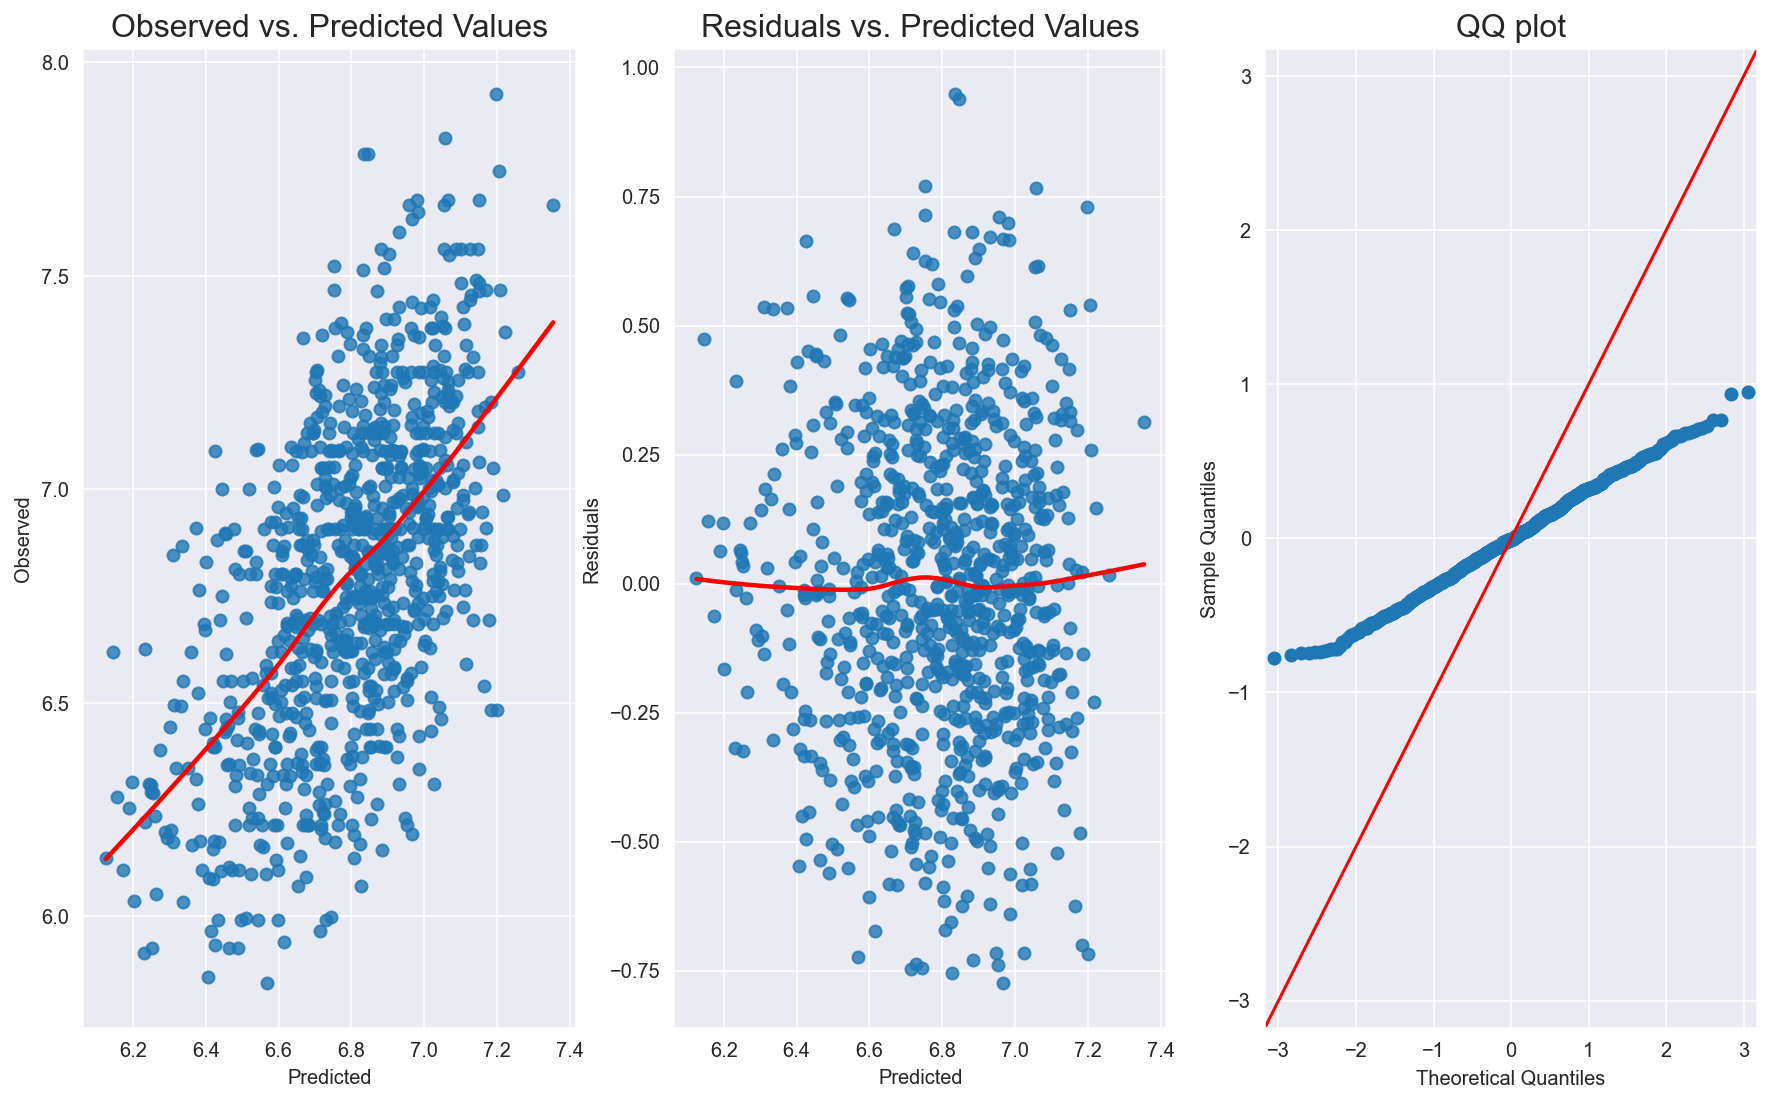

In [72]:
linearity_test(results, Y)  

**Interpretaion:** 
1. Transformations include 
    ` [Box-Cox transformation on hours, educ]`, and
     `[log transformation on tenure]`
2. The overall result for the new regression shows linearity and normality.
3. The result is more fit for kww

# Modeling Issues in Regression
## Multicollinearity

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

hours        IQ       KWW      educ     exper    tenure       age  \
vif  1.026748  1.748475  1.763496  2.008787  1.814959  1.129909  1.773791   

      married   black     south     urban   brthord     meduc     feduc  
vif  1.026991  1.2844  1.117196  1.056194  1.092941  1.504079  1.527411

**Interpretation:**  
VIF TEST shows no sign of multicollinearity (VIF of all variables are smaller than 10)

## Model Misspecification: Ramsey RESET

In [74]:
results1=smf.ols('lwage ~ ltenure + IQ + KWW +  married + black + south + urban',data=mydata).fit()

In [75]:
import statsmodels.stats.outliers_influence as smo
reset_out = smo.reset_ramsey(res = results1, degree = 3)
reset_out

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.231722691745337, p=0.7932149255702385, df_denom=871, df_num=2>

**Interpretation:**  
Since p-value is 0.7932, which is greater than 0.05, so we fail to reject the null of correct specification and the functional form is adequate.

## Model Selection
### Akaike Information Criterion (AIC)

In [76]:
subdata = mydata[['hours', 'educ', 'ltenure', 'IQ', 'KWW', 'age', 'married', 'black', 'south', 'urban']].copy()

In [77]:
storage_aic = pd.DataFrame(columns = ["Variables", "AIC"])

import itertools
for L in range(1, len(subdata.columns[1:]) + 1):
    for subset in itertools.combinations(subdata.columns[1:], L):
        
        formula1 = 'lwage~'+'+'.join(subset)
        results = smf.ols(formula=formula1, data = mydata).fit()
    
        storage_aic = storage_aic.append({'Variables': subset, 'AIC': results.aic}, ignore_index = True)

In [78]:
storage_aic[storage_aic.AIC == storage_aic.AIC.min()]

Variables         AIC
510  (educ, ltenure, IQ, KWW, age, married, black, ...  403.546299

In [79]:
ols_aic = smf.ols(formula = 'lwage ~ ltenure+IQ+KWW+age+married+black+south+urban',data=mydata)
aic_fit = ols_aic.fit()

aic_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     52.75
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           9.06e-70
Time:                        16:46:36   Log-Likelihood:                -212.57
No. Observations:                 881   AIC:                             443.1
Df Residuals:                     872   BIC:                             486.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2414      0.148     35.347      0.000       4.950       5.532
ltenure        0.0622      0.012      5.236      0.000       0.039       0.086
IQ             0.0056      0.001      6.622      0.000       0.004       0.007
KWW            0.0082      0.002      4.729      0.000       0.005       0.012
age            0.0100      0.004      2.585      0.010       0.002       0.018
married        0.1809      0.036      5.042      0.000       0.111       0.251
black         -0.1228      0.036     -3.430      0.001      -0.193      -0.053
south         -0.0818      0.023     -3.523      0.000      -0.127      -0.036
urban          0.1908      0.024      8.012      0.000       0.144       0.238
==============================================================================
Omnibus:                        4.009   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.221
Skew:                           0.019   Prob(JB):                        0.200
Kurtosis:                       2.706   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bayesian Information Criterion (BIC)

In [80]:
storage_bic = pd.DataFrame(columns = ["Variables", "BIC"])

import itertools
for L in range(1, len(subdata.columns[1:]) + 1):
    for subset in itertools.combinations(subdata.columns[1:], L):
        
        formula1 = 'lwage~'+'+'.join(subset)
        results = smf.ols(formula=formula1, data = mydata).fit()
    
        storage_bic = storage_bic.append({'Variables': subset, 'BIC': results.bic}, ignore_index = True)

In [81]:
storage_bic[storage_bic.BIC == storage_bic.BIC.min()]

Variables         BIC
510  (educ, ltenure, IQ, KWW, age, married, black, ...  451.356875

In [82]:
ols_bic = smf.ols(formula = 'lwage ~ ltenure+IQ+KWW+married+black+south+urban',data=mydata)
bic_fit = ols_bic.fit()

bic_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     58.94
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           3.02e-69
Time:                        16:46:53   Log-Likelihood:                -215.93
No. Observations:                 881   AIC:                             447.9
Df Residuals:                     873   BIC:                             486.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5399      0.093     59.356      0.000       5.357       5.723
ltenure        0.0671      0.012      5.707      0.000       0.044       0.090
IQ             0.0051      0.001      6.168      0.000       0.003       0.007
KWW            0.0102      0.002      6.537      0.000       0.007       0.013
married        0.1890      0.036      5.269      0.000       0.119       0.259
black         -0.1207      0.036     -3.362      0.001      -0.191      -0.050
south         -0.0846      0.023     -3.639      0.000      -0.130      -0.039
urban          0.1889      0.024      7.912      0.000       0.142       0.236
==============================================================================
Omnibus:                        3.276   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                2.723
Skew:                           0.002   Prob(JB):                        0.256
Kurtosis:                       2.728   Cond. No.                         990.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation**:\
Since the model that AIC and BIC prefer are similar, we will choose the one with higher adjusted $R^2$ which is $$log(wage) = log(tenure)+IQ+KWW+married+black+south+urban$$

# Heteroskedasticity
## Spred Level Plot

Fisrt check whether the variance of our errors is related to regressors 
using a spread-level plot.

In [83]:
def spread_level(model, data):
    df_copy = data.copy()
    
    # Get the studentized residuals
    df_copy["Absolute_Studentized_Residuals"] = (np.abs(model.get_influence().resid_studentized))
    df_copy["Fitted_Values"] = (model.fittedvalues)
    
    # run regression to get slope of fitted vs resid, rlm is a robust linear model used by R
    slreg = smf.rlm("np.log(Absolute_Studentized_Residuals) ~ np.log(Fitted_Values)", df_copy).fit()
    slope = slreg.params[1]
    
    # plot values
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.set_title("Fitted Values vs Studentized Residuals")
    sns.regplot(x = "Fitted_Values", y = "Absolute_Studentized_Residuals", data = df_copy, lowess = True, ax = ax)
    ax.plot(df_copy.Fitted_Values.values, np.exp(slreg.fittedvalues).values)
    
    # Set to the logarithmic scale
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    # convert froms scientific notation to scalar notation
    ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    
    # Resolve overlapping label bug
    ax.minorticks_off()
    
    # Set tick labels automatically
    ax.set_xticks(np.linspace(df_copy["Fitted_Values"].min(),df_copy["Fitted_Values"].max(), 6))
    ax.set_yticks(np.linspace(df_copy["Absolute_Studentized_Residuals"].min(),
                              df_copy["Absolute_Studentized_Residuals"].max(), 6))
    
    ax.grid()
    
    # return a suggested power transform of your y-variable that may correct heteroscedastcity
    # The transform is just one minus the slope of the reegression line of your fitted values vs residuals
    print("Suggested Power Transformation:", 1-slope)

Suggested Power Transformation: 0.2029651552096975


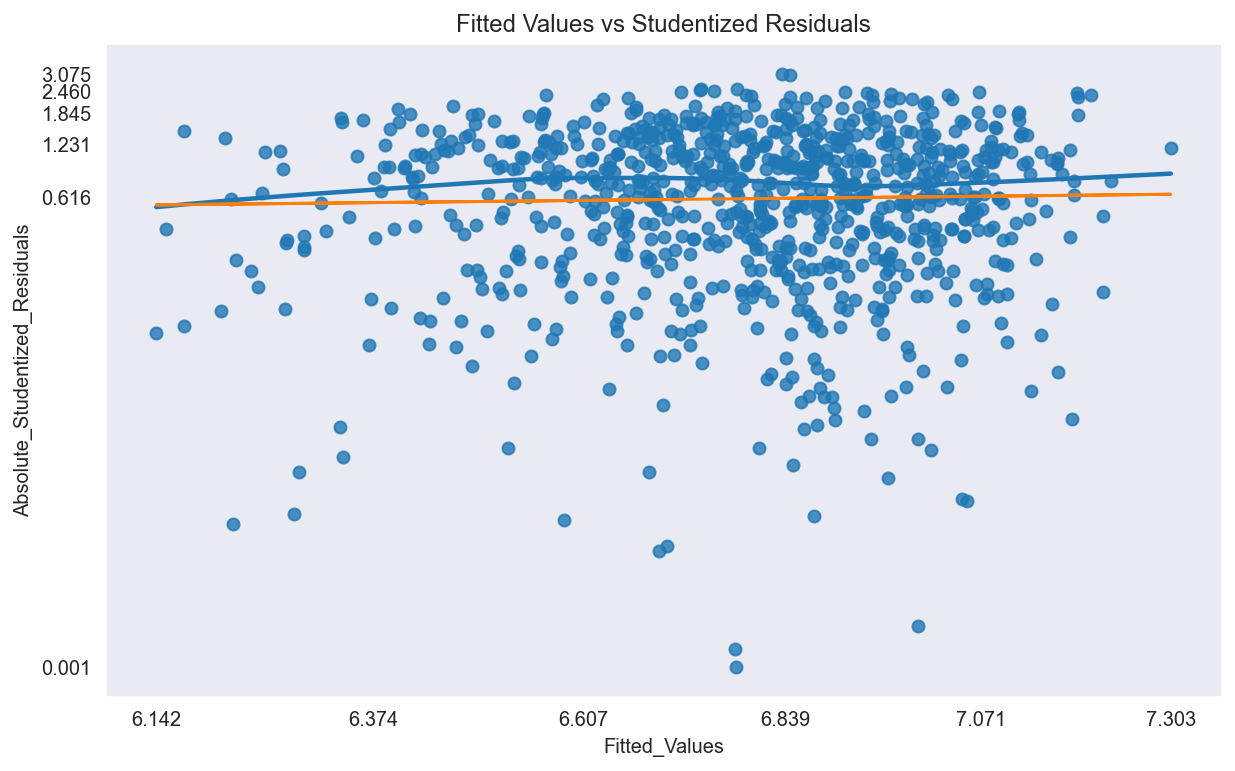

In [84]:
model =smf.ols('lwage ~   ltenure + IQ + KWW + married + black + south + urban', mydata)
results = model.fit()
spread_level(results,mydata)

**Interpretation**  
The intuitive result is that there is no sign of heteroskedasticity, but futher inspections are still needed.

## White Test

In [85]:
y, X = pt.dmatrices('lwage ~  ltenure + IQ + KWW + married + black + south + urban', mydata,
                   return_type = 'dataframe')

In [86]:
# Order is Lm Test statistic, LM P-value, F-stat, F-Pvalue
sm.stats.diagnostic.het_white(results.resid, X)

(61.44880547655916,
 0.0009079320387249731,
 2.0534463173148194,
 0.0006928628882559804)

**Interpretation**  
p-value > 0.05, can not reject H0: variance = constant

## Goldfeld-Quandt Test

In [87]:
sortedv = mydata.sort_values(by = "urban").copy().reset_index()
splt = sortedv.urban.argmax()
gq_reg = smf.ols('lwage ~  ltenure + IQ + KWW + married + black + south + urban', sortedv).fit()
y = gq_reg.model.endog
X = gq_reg.model.exog

# Order is f-stat, pvalue, hypothesis
sm.stats.diagnostic.het_goldfeldquandt(y, X, idx = 5, alternative = 'increasing', split= splt)

(1.0180421460455125, 0.4275943145985821, 'increasing')

**Interpretation**
Can not rejec H0. There is no heteroskedasticity in the model.

# Marginal Effect

The following section analyzed the partial effect of each variable in our model.

In [88]:
model =smf.ols('lwage ~  ltenure + IQ + KWW + married + black + south + urban', mydata)
results = model.fit()
results.params

Intercept    5.539871
ltenure      0.067127
IQ           0.005064
KWW          0.010238
married      0.188971
black       -0.120709
south       -0.084643
urban        0.188918
dtype: float64

In [89]:
xt = np.linspace(mydata.ltenure.min(),mydata.ltenure.max(), 50)
xi = np.linspace(IQ.min(),IQ.max(), 50)
xk = np.linspace(KWW.min(),KWW.max(), 50)
# sales fixed values
meansales = np.log(lwage).mean()

# we fix consprod at the mean
meanltenure = np.mean(mydata.ltenure)
meanIQ = np.mean(IQ)
meanKWW = np.mean(KWW)


In [90]:
# form the fitted values at each different fixed value
y_tenure =  results.params[0] + results.params[1]*xt +results.params[2]*meanIQ +results.params[3]*meanKWW
y_iq =  results.params[0] + results.params[1]*meanltenure +results.params[2]*xi +results.params[3]*meanKWW
y_KWW =  results.params[0] + results.params[1]*meanltenure +results.params[2]*meanIQ +results.params[3]*xk


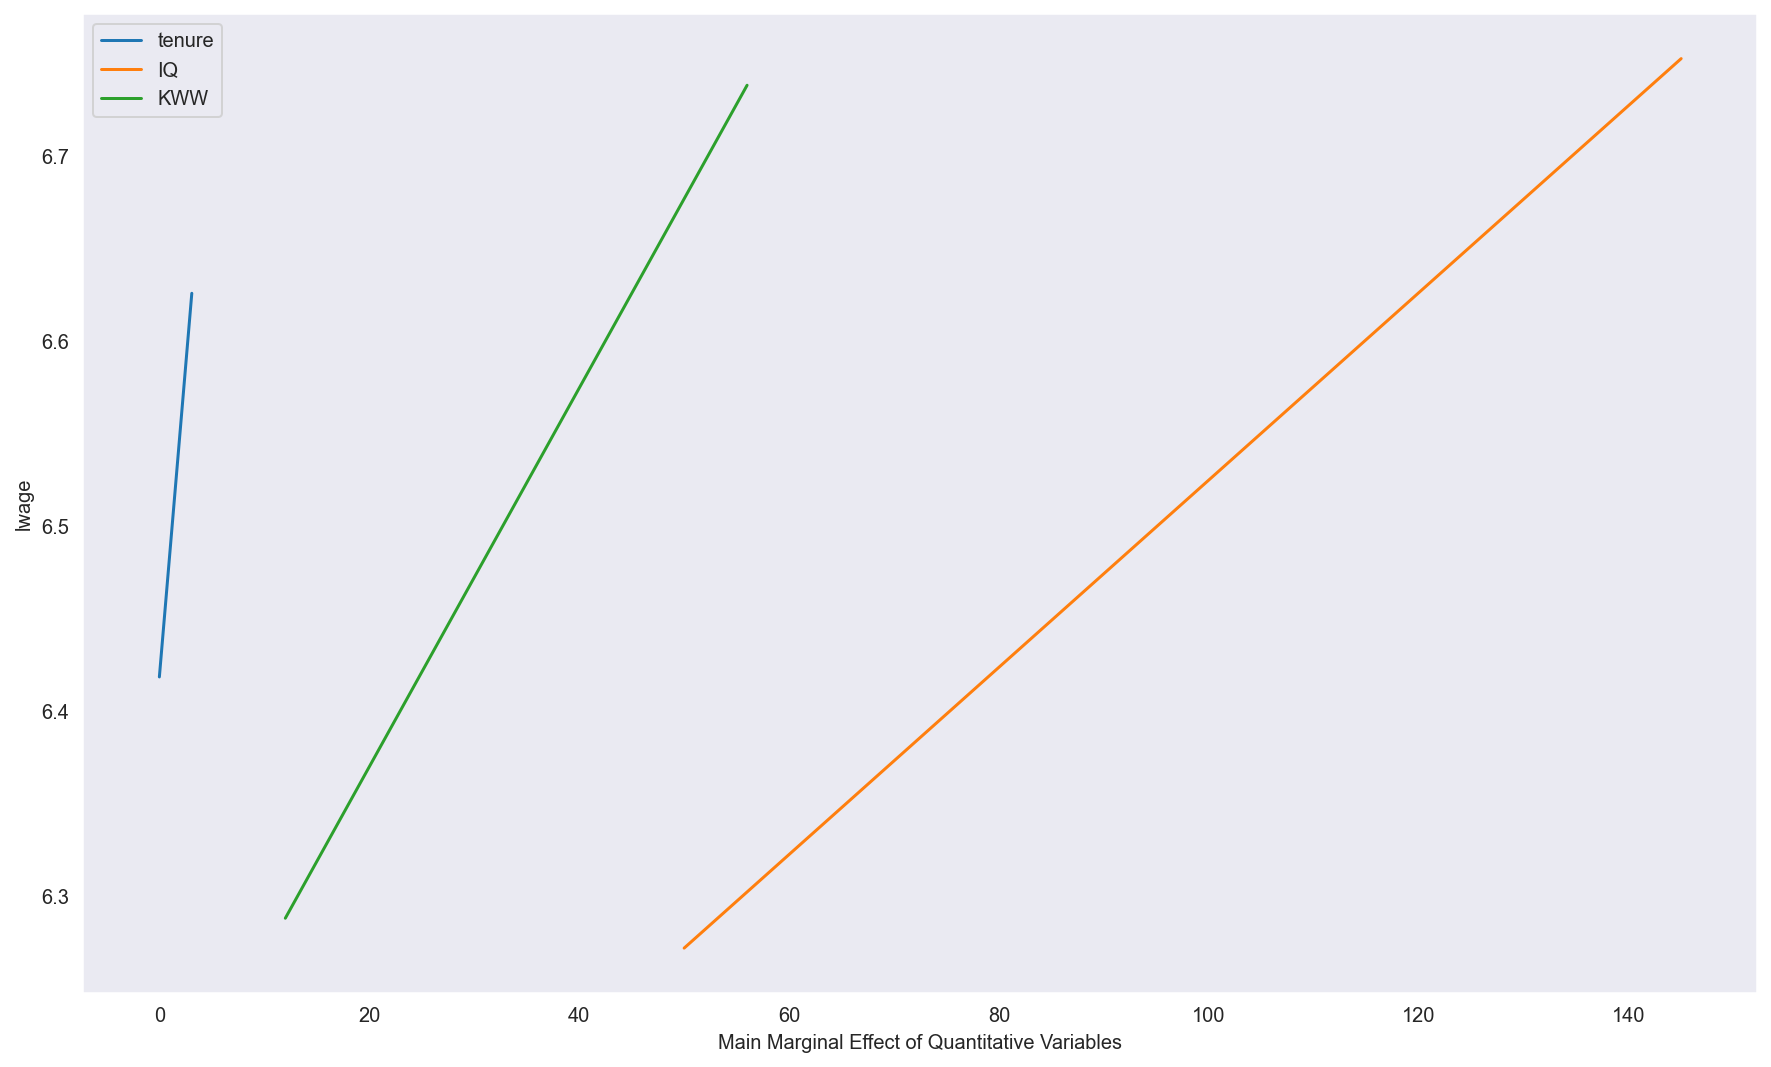

In [91]:
# plot x against each y predicted at different fixed levels of log(sales)
plt.plot(xt, y_tenure, label='tenure')
plt.plot(xi, y_iq, label='IQ')
plt.plot(xk, y_KWW, label='KWW')

plt.legend(loc="upper left")

plt.xlabel("Main Marginal Effect of Quantitative Variables")
plt.ylabel("lwage")


plt.grid()

# Random Sampling
## Cross-Validation

In [92]:
import sklearn 
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score 
kf = KFold(n_splits = 5) 
for train_index, test_index in kf.split(lwage):
    print("TRAIN:", train_index[:50], "TEST:",test_index[:50])

TRAIN: [177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 3

In [93]:
x = mydata.to_numpy(mydata['IQ'])
y = mydata.to_numpy(mydata['lwage'])

regr = LinearRegression()
scores = cross_val_score(regr,x,y,cv=5,scoring='neg_mean_squared_error')

print('5-fold CV MSE Scores:', scores)

5-fold CV MSE Scores: [-0.00473682 -0.00569938 -0.00518177 -0.00605384 -0.00541939]


## Training and Testing

In [94]:
from sklearn.model_selection import train_test_split 
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score

x = mydata[['IQ']]

y = mydata[['lwage']]

# Perform an OLS fit using all the data 
regr = LinearRegression() 
model = regr.fit(x,y) 
regr.coef_ 
regr.intercept_

# Split the data into train (70%)/test(30%) samples:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train the model:
regr = LinearRegression() 
regr.fit(x_train, y_train)

# Make predictions based on the test sample 
y_pred = regr.predict(x_test)

# Evaluate Performance
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2732927298960118
MSE: 0.11726017626728237
RMSE: 0.34243273247060124


# Conclusion
## Evaluation Process

First, we performed the boruta algorithm to pick the top 6 quantitative variables, and we included all the indicator variables in our first regression model. Then, we completed the descriptive analysis of the variables to get insights into the overall data shape and their correlations. Other than helping us understand the essential natures of our dataset, results showed normality within the data. We also discovered problems with outliers, which we subtracted in the latter analysis. 

Over examining the scatter plot, we tested the linearity of variables by plotting the observed and prediction values, the residual and predicted values and Q-Q-plot for residuals. The results provide empirical evidence for data selection in our next step. We then transformed several pieces of data using Box-Cox and straightforward log transform to change the shape of data to increase linearity. 

After that, we used the data after transformation to perform the Ramsey RESET test to determine if any interaction term was needed. We acquired our final model according to our AIC and BIC results based on every combination of the variable in our first regression model.

Finally, we used various tests to see if our final model contained heteroskedasticity. We also examined the robustness of our model by using Bootstrapping and K-fold. We reached satisfactory results.

## Economic Significance

Wage is a import subject of study in the flied of labor economics. Higher wages increase labor costs but also improve the productivity of the labor force in several ways.

Efficiency wage theory focuses on the role of industry effects in explaining variation in wages across workers. Our study provides insight to personal and industrial factors of how personal wage evolute with IQ. 

This study also has a pratical significance.The Companies and governments benefit from paying fair wages.Raising the minimum wage can reallocate workers to more productive establishments. It can address poverty and social inequality and stimulate economic dynamism.

## Findings

Many industry factors are relevant to wage of employer. Among which, IQ is the most strongly correlated predicator. Wage is positively correlated with IQ, and we predicted one percent increase in IQ will induce 0.9 percent change in personal wage.